# **Savera Shah**
### **Assignment 3**
### **REPORT CODE FILE**

### Capital Bikeshare Data
https://ride.capitalbikeshare.com/system-data

In [330]:
from google.colab import drive

# Mount Google Drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [329]:
import pandas as pd
# Read csv files

df_Feb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Content/202402-capitalbikeshare-tripdata.csv')
df_Mar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Content/202403-capitalbikeshare-tripdata.csv')
df_Apr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Content/202404-capitalbikeshare-tripdata.csv')

# concat data
df=pd.concat([df_Feb, df_Mar,df_Apr])

In [331]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


## Let's consider the GWSB station "22nd & H St NW"

### Bike Availability: Number of Pickups

In [332]:
# Convert the 'started_at' column to datetime objects
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date

# Filter for trips started at '22nd & H St NW'
PU_trips = df[df['start_station_name'] == '22nd & H St NW']

# Group by date and count the trips
PU_counts = PU_trips.groupby('started_at_date')['started_at_date'].count()

PU_counts

,started_at_date
started_at_date,
2024-02-01,33
2024-02-02,23
2024-02-03,22
2024-02-04,18
2024-02-05,19
...,...
2024-04-26,33
2024-04-27,18
2024-04-28,36


### Dock Availability: Number of Dropoffs

In [333]:
# Convert the 'ended_at' column to datetime objects
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

# Filter for trips ended at '22nd & H St NW'
DO_trips = df[df['end_station_name'] == '22nd & H St NW']

# Group by date and count the trips
DO_counts = DO_trips.groupby('ended_at_date')['ended_at_date'].count()

DO_counts

,ended_at_date
ended_at_date,
2024-02-01,33
2024-02-02,25
2024-02-03,20
2024-02-04,19
2024-02-05,23
...,...
2024-04-26,39
2024-04-27,24
2024-04-28,28


## Merge PU and DO tables
- For each day, we look at the numbers of pickups and dropoffs

In [334]:
# merge PU_counts and DO_counts by matching the dates, and change the column names to PU_count and DO_count respectively.

PU_DO_counts = pd.merge(PU_counts, DO_counts, left_index=True, right_index=True, how='outer')
PU_DO_counts = PU_DO_counts.rename(columns={'started_at_date': 'PU_ct', 'ended_at_date': 'DO_ct'})

# change the index name from 'started_at' to 'date'

PU_DO_counts = PU_DO_counts.rename_axis('date')
PU_DO_counts

,PU_ct,DO_ct
date,,
2024-02-01,33,33
2024-02-02,23,25
2024-02-03,22,20
2024-02-04,18,19
2024-02-05,19,23
...,...,...
2024-04-26,33,39
2024-04-27,18,24
2024-04-28,36,28


# Feature Information: Weather Data
- From https://www.visualcrossing.com/weather-history/

In [335]:
df_weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Content/DC_weather_2024.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,...,0.9,1,10,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
1,"washington, dc",2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,...,8.3,5,10,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
2,"washington, dc",2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,...,9.6,5,10,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,D6279,72403793728,KADW,..."
3,"washington, dc",2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,...,4.8,4,10,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,KADW,KDAA,7..."
4,"washington, dc",2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,...,11.6,5,10,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,D6279,KADW,..."


## Drop variables of your choice

In [336]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge df_weather with PU_DO_counts

In [337]:
# Convert the 'datetime' column to datetime objects and extract the date
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['date'] = df_weather['datetime'].dt.date

# Merge the two dataframes based on the 'date' column
merged_df = pd.merge(PU_DO_counts, df_weather, on='date', how='left')

# Prepare training and test data

In [338]:
# we have two target variables: PU_ct and DO_ct
y = merged_df[['PU_ct','DO_ct']]
X_all = merged_df.drop(columns=['PU_ct','DO_ct']) # all features
X_all

,date,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2024-02-01,2024-02-01,53.0,31.7,42.4,53.0,26.4,39.3,34.0,74.0,...,12.0,190.8,1016.3,43.3,8.4,136.8,11.8,5,0.73,partly-cloudy-day
1,2024-02-02,2024-02-02,51.8,44.0,47.1,51.8,36.6,44.4,35.5,65.1,...,19.1,354.3,1012.8,97.3,9.8,51.7,4.4,2,0.75,rain
2,2024-02-03,2024-02-03,51.0,35.8,42.2,51.0,28.0,37.6,26.2,53.8,...,14.7,354.9,1018.2,11.0,9.9,143.9,12.5,6,0.79,clear-day
3,2024-02-04,2024-02-04,51.2,32.7,41.7,51.2,27.4,40.7,26.0,56.4,...,9.2,87.4,1016.0,9.0,9.9,147.4,12.8,6,0.83,clear-day
4,2024-02-05,2024-02-05,51.8,32.5,41.0,51.8,26.0,37.8,26.0,57.4,...,12.2,34.9,1013.8,21.4,9.9,145.3,12.7,6,0.86,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024-04-26,2024-04-26,64.9,45.5,55.2,64.9,41.5,54.2,34.9,50.8,...,15.4,116.4,1029.5,69.1,9.9,215.0,18.5,9,0.59,partly-cloudy-day
86,2024-04-27,2024-04-27,60.1,51.9,55.7,60.1,51.9,55.7,45.4,69.0,...,10.0,149.9,1030.1,97.3,9.7,44.0,3.9,2,0.63,rain
87,2024-04-28,2024-04-28,83.1,55.8,67.0,83.3,55.8,67.1,56.4,70.6,...,10.0,170.0,1021.3,62.1,9.8,213.6,18.5,9,0.67,partly-cloudy-day
88,2024-04-29,2024-04-29,88.3,62.7,75.2,88.9,62.7,75.3,60.9,63.5,...,13.0,177.3,1015.6,35.8,9.9,204.5,17.8,9,0.70,partly-cloudy-day


## Reduce dimensions by feature type

In [339]:
#dimentionality reduction: PCA
def dim_red(dataframe,lists,columnname):
    #extract the columns
    datagroup=dataframe.filter(lists)
    #normalize the data
    from sklearn.preprocessing import StandardScaler
    data_norm = StandardScaler().fit_transform(datagroup)
    #feature extraction with PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=1)
    PCs = pca.fit_transform(datagroup)

    df_pca = pd.DataFrame(data = PCs, columns = [columnname])
    return df_pca

In [340]:
temp_group=['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike','dew']
precip_group=['humidity','precip', 'precipprob', 'precipcover']
vis_group=['visibility','solarradiation', 'solarenergy', 'uvindex']
wind_group=['windgust','windspeed', 'winddir']

In [341]:
temp_PC1=dim_red(X_all,temp_group,'temp_PC1')
precip_PC1=dim_red(X_all,precip_group,'precip_PC1')
vis_PC1=dim_red(X_all,vis_group,'vis_PC1')
wind_PC1=dim_red(X_all,wind_group,'wind_PC1')

## Dimension reduction on the features
- Now we call the following features X

In [342]:
X = pd.concat([temp_PC1,precip_PC1,vis_PC1,wind_PC1],axis = 1)
X

,temp_PC1,precip_PC1,vis_PC1,wind_PC1
0,-23.616810,-32.623727,4.466466,-0.835152
1,-11.905681,62.494225,-80.995297,162.790919
2,-26.760771,-36.797274,11.641535,163.281210
3,-26.853470,-36.260085,15.152105,-104.272810
4,-28.487066,-36.053473,13.052631,-156.681869
...,...,...,...,...
85,7.209137,-37.417107,83.053732,-75.127468
86,14.738853,63.300059,-88.705521,-41.772262
87,47.863874,-33.326205,81.659100,-21.678490
88,65.008395,-34.793145,72.539192,-14.306077


## <font color="red"> Important: train_test_split with y=['PU_ct','DO_ct']. Why? <font>

In [343]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200) # 40% test data

In [344]:
y_train.head()

,PU_ct,DO_ct
73,26,24
60,26,22
18,10,15
44,19,20
4,19,23


# <font color="red"> Your code starts from here... </font>
- In this assignment, we first reduce the dimensions and then use only [temp_PC1,precip_PC1,vis_PC1,wind_PC1] for prediction.
- Follow the discussion and details in Lecture 6.
- Based on the analysis and result, summarize a 5-page final report in PDF.
- Submit the final report with Python file.

# ***Exploratory Analysis***

#### **Loading all required Packages/Libraries**

In [345]:
# Importing all required libraries.
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import plot_tree

# sklearn modules for data preprocessing:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from pprint import pprint

import warnings
warnings.simplefilter("ignore")

### **Summary Statistics of the whole data-set**

In [346]:
# Shape of the dataframes
print("Shape of df:", df.shape)
print("Shape of df_weather:", df_weather.shape)

# Data types of columns
print("\nData types of df:\n", df.dtypes)
print("\nData types of df_weather:\n", df_weather.dtypes)

# Summary statistics
print("\nSummary statistics of df:\n", df.describe())
print("\nSummary statistics of df_weather:\n", df_weather.describe())

Shape of df: (1245899, 15)
Shape of df_weather: (366, 25)

Data types of df:
 ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
started_at_date        object
ended_at_date          object
dtype: object

Data types of df_weather:
 datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                   int64
precipcover                float64
snow      

### **Summary Statistics PCs and Target Variables**

In [347]:
# Combine principal components into a single DataFrame
pca_df = pd.concat([temp_PC1, precip_PC1, vis_PC1, wind_PC1], axis=1)

# Combine principal components and dependent variables into a single DataFrame
summary_df = pd.concat([pca_df, merged_df[['PU_ct', 'DO_ct']]], axis=1)

# Get summary statistics
summary_stats = summary_df.describe()

# Print the summary statistics
print(summary_stats)

           temp_PC1    precip_PC1       vis_PC1      wind_PC1      PU_ct  \
count  9.000000e+01  9.000000e+01  9.000000e+01  9.000000e+01  90.000000   
mean   1.294767e-14 -3.868510e-15  3.568504e-14 -4.105358e-15  25.788889   
std    2.663702e+01  5.049623e+01  6.538216e+01  1.063508e+02   9.575829   
min   -4.656371e+01 -4.117743e+01 -1.174665e+02 -1.885948e+02   2.000000   
25%   -2.351309e+01 -3.768570e+01 -5.604744e+01 -8.955340e+01  18.250000   
50%   -5.098084e-01 -3.550595e+01  8.054001e+00 -1.141693e+01  26.000000   
75%    1.575963e+01  6.304175e+01  5.405860e+01  1.066164e+02  33.000000   
max    6.500839e+01  7.825041e+01  1.410322e+02  1.632812e+02  47.000000   

           DO_ct  
count  90.000000  
mean   26.088889  
std     9.768839  
min     4.000000  
25%    19.000000  
50%    26.000000  
75%    33.000000  
max    49.000000  


### **Heat Map of PCs and Pick-up & Drop-off**

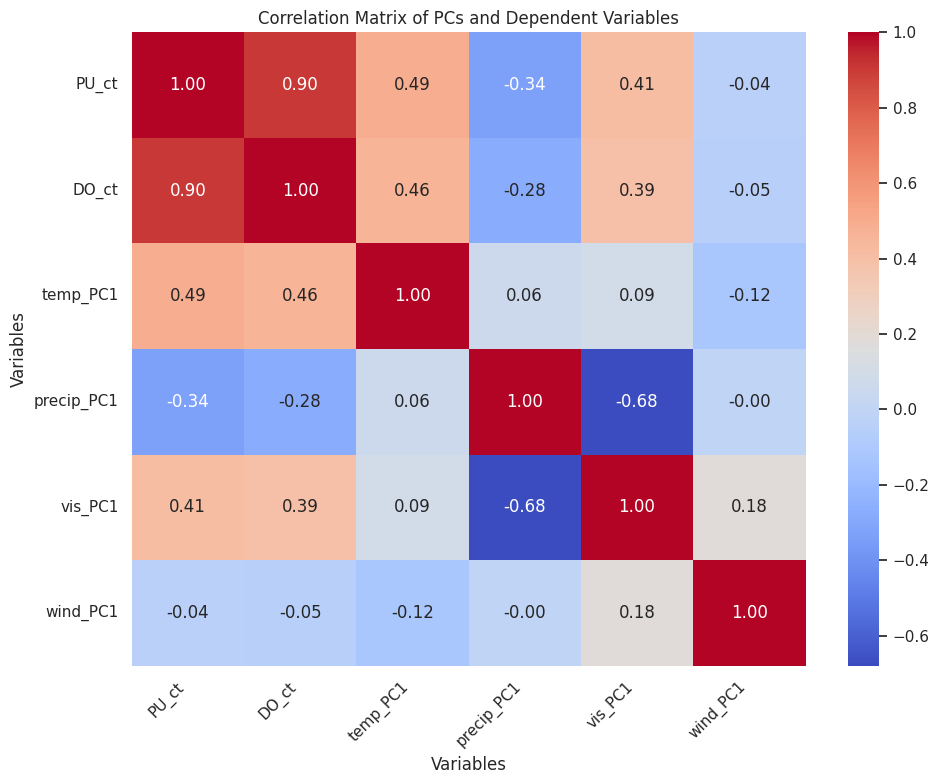

In [348]:
# Combine principal components and dependent variables into a single DataFrame
heatmap_df = pd.concat([pca_df, merged_df[['PU_ct', 'DO_ct']]], axis=1)

# Combine principal components and dependent variables into a single DataFrame
heatmap_df = pd.concat([merged_df[['PU_ct', 'DO_ct']], pca_df], axis=1)

# Calculate correlation matrix
correlation_matrix = heatmap_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of PCs and Dependent Variables")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Bike Demand over Time**

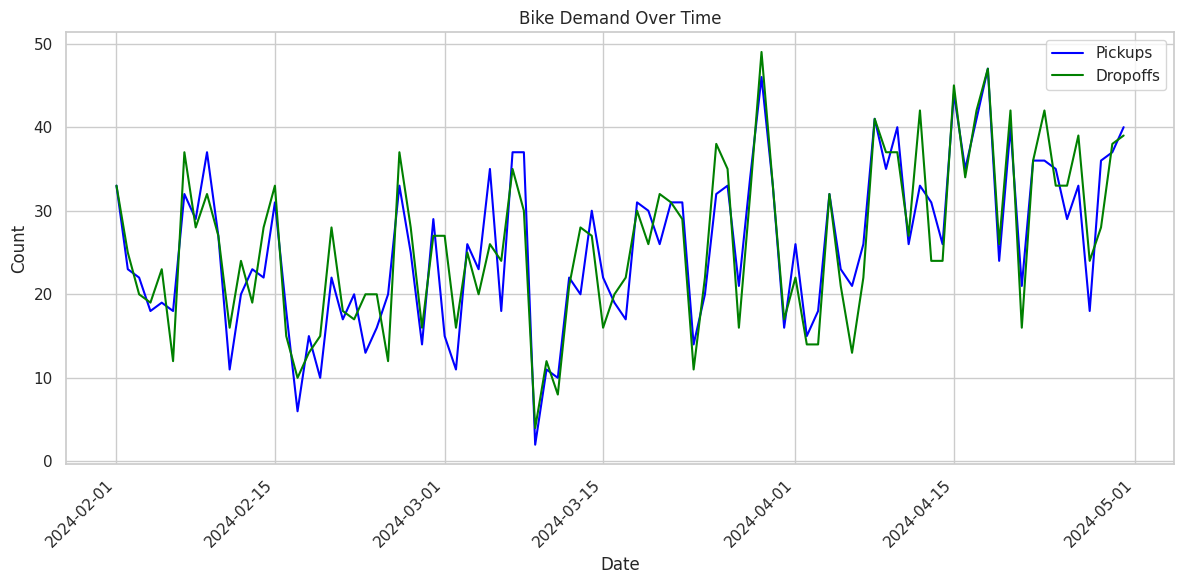

In [349]:
# Plot pickups and dropoffs over time
plt.figure(figsize=(12, 6))
plt.plot(PU_DO_counts.index, PU_DO_counts['PU_ct'], label='Pickups', color='blue')
plt.plot(PU_DO_counts.index, PU_DO_counts['DO_ct'], label='Dropoffs', color='green')
plt.title('Bike Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### **Scatter Plots of Pick-ups Vs PCs**

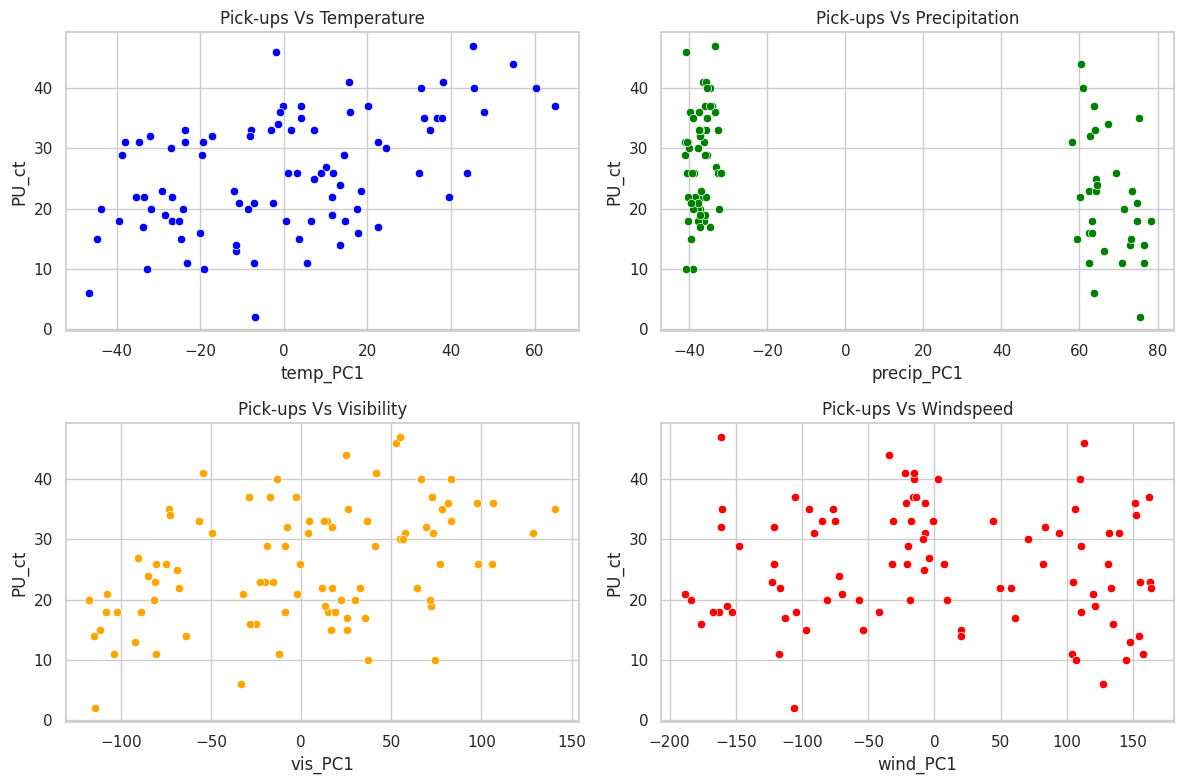

In [350]:
# Create a figure with subplots for each PC
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns for 4 PCs

# Plot PC1 vs. PU_ct
sns.scatterplot(x=pca_df['temp_PC1'], y=merged_df['PU_ct'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Pick-ups Vs Temperature')

# Plot PC2 vs. PU_ct
sns.scatterplot(x=pca_df['precip_PC1'], y=merged_df['PU_ct'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Pick-ups Vs Precipitation')

# Plot PC3 vs. PU_ct
sns.scatterplot(x=pca_df['vis_PC1'], y=merged_df['PU_ct'], ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Pick-ups Vs Visibility')

# Plot PC4 vs. PU_ct
sns.scatterplot(x=pca_df['wind_PC1'], y=merged_df['PU_ct'], ax=axes[1, 1], color='red')
axes[1, 1].set_title('Pick-ups Vs Windspeed')

plt.tight_layout()
plt.show()

### **Scatter Plots of Drop-offs Vs PCs**

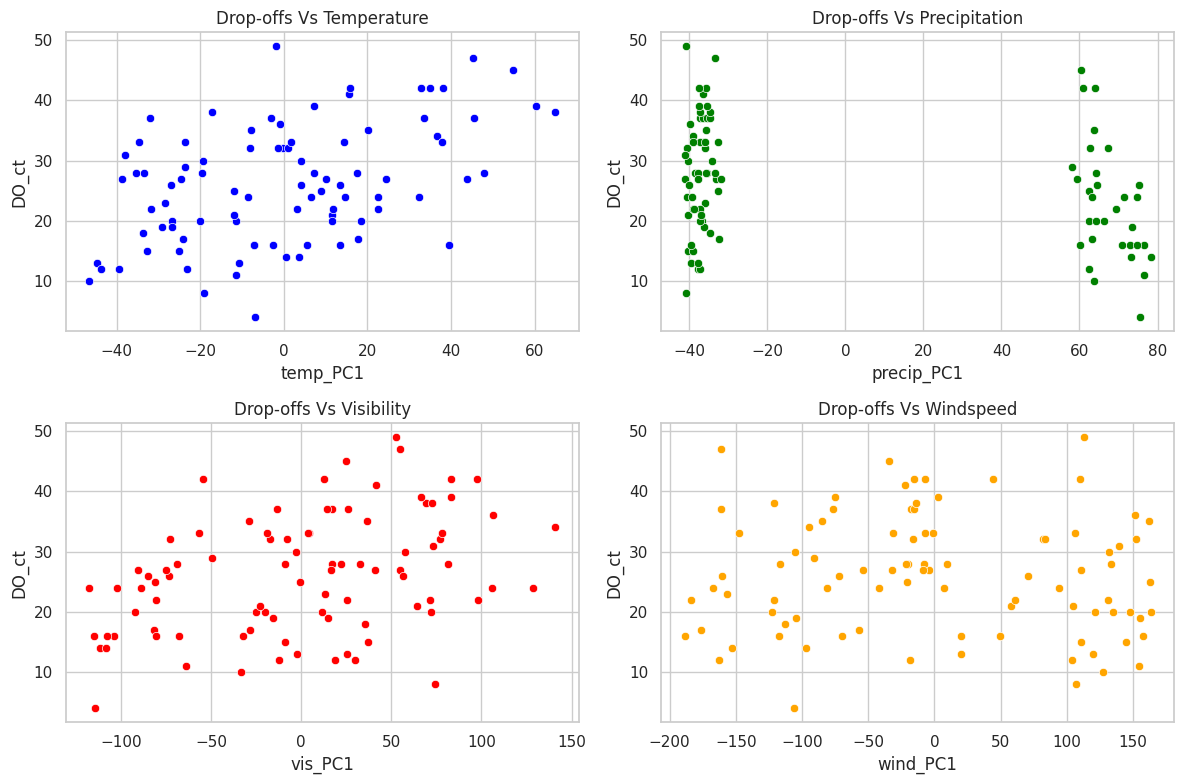

In [351]:
# Create a figure with subplots for each PC
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot PC1 vs. DO_ct
sns.scatterplot(x=pca_df['temp_PC1'], y=merged_df['DO_ct'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Drop-offs Vs Temperature')

# Plot PC2 vs. DO_ct
sns.scatterplot(x=pca_df['precip_PC1'], y=merged_df['DO_ct'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Drop-offs Vs Precipitation')

# Plot PC3 vs. DO_ct
sns.scatterplot(x=pca_df['vis_PC1'], y=merged_df['DO_ct'], ax=axes[1, 0], color='red')
axes[1, 0].set_title('Drop-offs Vs Visibility')

# Plot PC4 vs. DO_ct
sns.scatterplot(x=pca_df['wind_PC1'], y=merged_df['DO_ct'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Drop-offs Vs Windspeed')

plt.tight_layout()

### **Reduced Weather Features**

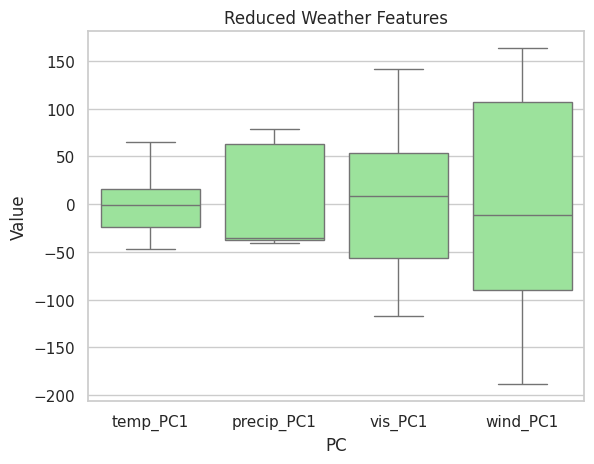

In [352]:
# Principal components
pca_df = pd.concat([temp_PC1, precip_PC1, vis_PC1, wind_PC1], axis=1)

# Melt the pca_df to long format for seaborn boxplot
melted_pca_df = pd.melt(pca_df, value_vars=pca_df.columns)
melted_pca_df.columns = ['PC', 'Value']  # Rename columns for clarity

# Now you can create the boxplot
sns.boxplot(x='PC', y='Value', data=melted_pca_df, color='lightgreen')
plt.title('Reduced Weather Features')
plt.show()

# **LINEAR REGRESSION**

## **Linear Regression - PICK-UP**

In [353]:
# Initializing the multiple linear regression model
mlr_pu = LinearRegression()
mlr_pu.fit(X_train, y_train['PU_ct'])

# Making Predictions on the training and test sets
y_train_pred_mlr_pu = mlr_pu.predict(X_train) # Changed here: assigned to y_train_pred_mlr_pu
y_test_pred_mlr_pu = mlr_pu.predict(X_test)  # Changed here: assigned to y_test_pred_mlr_pu

# Computing the MSE for training and test sets and printing the results.
train_mse_mlr_pu = mean_squared_error(y_train['PU_ct'], y_train_pred_mlr_pu) # Changed here: using y_train_pred_mlr_pu
test_mse_mlr_pu = mean_squared_error(y_test['PU_ct'], y_test_pred_mlr_pu)  # Changed here: using y_test_pred_mlr_pu
print(f"Training MSE Linear Regression Pick-up: {train_mse_mlr_pu:.4f}")
print(f"Test MSE Linear Regression Pick-up: {test_mse_mlr_pu:.4f}")

# Computing R-squared for training and test sets and printing the results.
train_r2_mlr_pu = r2_score(y_train['PU_ct'], y_train_pred_mlr_pu) # Changed here: using y_train_pred_mlr_pu
test_r2_mlr_pu = r2_score(y_test['PU_ct'], y_test_pred_mlr_pu)  # Changed here: using y_test_pred_mlr_pu
print(f"Training R-squared Linear Regression Pick-up: {train_r2_mlr_pu:.4f}")
print(f"Test R-squared Linear Regression Pick-up: {test_r2_mlr_pu:.4f}")

Training MSE Linear Regression Pick-up: 56.2071
Test MSE Linear Regression Pick-up: 55.5805
Training R-squared Linear Regression Pick-up: 0.4003
Test R-squared Linear Regression Pick-up: 0.3367


## **Linear Regression - DROP-OFF**

In [354]:
# Initializing the multiple linear regression model
mlr_pu = LinearRegression()
mlr_pu.fit(X_train, y_train['DO_ct'])

# Making Predictions on the training and test sets
y_train_pred_mlr_do = mlr_pu.predict(X_train)
y_test_pred_mlr_do = mlr_pu.predict(X_test)

# Computing the MSE for training and test sets and printing the results.
train_mse_mlr_do = mean_squared_error(y_train['DO_ct'], y_train_pred_mlr_do)
test_mse_mlr_do = mean_squared_error(y_test['DO_ct'], y_test_pred_mlr_do)
print(f"Training MSE Linear Regression Drop-off: {train_mse_mlr_do:.4f}")
print(f"Test MSE Linear Regression Drop-off: {test_mse_mlr_do:.4f}")

# Computing R-squared for training and test sets and printing the results.
train_r2_mlr_do = r2_score(y_train['DO_ct'], y_train_pred_mlr_do)
test_r2_mlr_do = r2_score(y_test['DO_ct'], y_test_pred_mlr_do)
print(f"Training R-squared Linear Regression Drop-off: {train_r2_mlr_do:.4f}")
print(f"Test R-squared Linear Regression Drop-off: {test_r2_mlr_do:.4f}")



Training MSE Linear Regression Drop-off: 58.0363
Test MSE Linear Regression Drop-off: 69.5466
Training R-squared Linear Regression Drop-off: 0.4060
Test R-squared Linear Regression Drop-off: 0.2013


## **Linear Regression - Out-of-Sample-Cost**

In [355]:
# Penalty values
alpha = 2  # Penalty for unsuccessful pickup
beta = 3   # Penalty for unsuccessful drop-off

min_total_cost = float('inf') #initialize minimum total cost
optimal_x, optimal_y = None, None #initialize optimal x and y

total_cost_test_y_all = []

# Loop through each test observation
for i in range(len(y_test_pred_mlr_pu)):

    min_cost_i = float('inf')  # Local min for this observation
    best_x, best_y = None, None

    # Try all combinations of x and y such that x + y = 17
    for x in range(18):
        y = 17 - x

        # Predicted pickup/dropoff values
        # Accessing using array indexing instead of .iloc
        pu_pred = y_test_pred_mlr_pu[i]
        do_pred = y_test_pred_mlr_do[i]

        # Compute penalty cost
        cost = alpha * np.maximum(0, pu_pred - x) + beta * np.maximum(0, do_pred - y)

        if cost < min_cost_i:
            min_cost_i = cost
            best_x, best_y = x, y

    # Use best_x, best_y to compute actual test cost
    # Accessing using .iloc since y_test is a DataFrame
    pu_actual = y_test['PU_ct'].iloc[i]
    do_actual = y_test['DO_ct'].iloc[i]

    cost_actual = (
        alpha * np.maximum(0, pu_actual - best_x) +
        beta * np.maximum(0, do_actual - best_y)
    )

    total_cost_test_y_all.append(cost_actual)

# Compute average cost across test set
out_of_sample_avg_cost_mlr = np.mean(total_cost_test_y_all)

print(f"Out-of-sample average cost in Linear Regression is ${out_of_sample_avg_cost_mlr:.4f}")

Out-of-sample average cost in Linear Regression is $76.6389


# **LASSO**

## **LASSO - PICK-UP**

In [365]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {'alpha': np.logspace(-4, 4, 100)}

# Initialize the Lasso model
lasso = Lasso(max_iter=100,)

# Initialize GridSearchCV
grid_search_pu = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best alpha
grid_search_pu.fit(X_train_scaled, y_train['PU_ct'])

# Get the best alpha value
best_alpha = grid_search_pu.best_params_['alpha']

# Train the final Lasso model with the best alpha
lasso_pu = Lasso(alpha=best_alpha,  random_state=42)
lasso_pu.fit(X_train_scaled, y_train['PU_ct'])

# Make predictions on the training and test sets
y_train_pred_lasso_pu = lasso_pu.predict(X_train_scaled)
y_test_pred_lasso_pu = lasso_pu.predict(X_test_scaled)

# Calculate and print the metrics
train_mse_lasso_pu = mean_squared_error(y_train['PU_ct'], y_train_pred_lasso_pu)
test_mse_lasso_pu = mean_squared_error(y_test['PU_ct'], y_test_pred_lasso_pu)
train_r2_lasso_pu = r2_score(y_train['PU_ct'], y_train_pred_lasso_pu)
test_r2_lasso_pu = r2_score(y_test['PU_ct'], y_test_pred_lasso_pu)

print(f"Best alpha: {best_alpha}")
print(f"Training MSE Lasso Regression Pick-up: {train_mse_lasso_pu:.4f}")
print(f"Test MSE Lasso Regression Pick-up: {test_mse_lasso_pu:.4f}")
print(f"Training R-squared Lasso Regression Pick-up: {train_r2_lasso_pu:.4f}")
print(f"Test R-squared Lasso Regression Pick-up: {test_r2_lasso_pu:.4f}")

Best alpha: 0.9111627561154896
Training MSE Lasso Regression Pick-up: 58.1256
Test MSE Lasso Regression Pick-up: 59.4939
Training R-squared Lasso Regression Pick-up: 0.3798
Test R-squared Lasso Regression Pick-up: 0.2900


## **LASSO - DROP-OFF**

In [364]:
# Scale the features (using the same scaler as for PU_ct)
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)      # Transform test data

# Define the hyperparameter grid (can be the same as for PU_ct)
param_grid = {'alpha': np.logspace(-4, 4, 100)}

# Initialize the Lasso model
lasso = Lasso(max_iter=100)

# Initialize GridSearchCV
grid_search_do = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best alpha for DO_ct
grid_search_do.fit(X_train_scaled, y_train['DO_ct'])

# Get the best alpha value for DO_ct
best_alpha_do = grid_search_do.best_params_['alpha']

# Train the final Lasso model for DO_ct with the best alpha
lasso_do = Lasso(alpha=best_alpha_do, random_state=250)
lasso_do.fit(X_train_scaled, y_train['DO_ct'])

# Make predictions on the training and test sets for DO_ct
y_train_pred_lasso_do = lasso_do.predict(X_train_scaled)
y_test_pred_lasso_do = lasso_do.predict(X_test_scaled)

# Calculate and print the metrics for DO_ct
train_mse_lasso_do = mean_squared_error(y_train['DO_ct'], y_train_pred_lasso_do)
test_mse_lasso_do = mean_squared_error(y_test['DO_ct'], y_test_pred_lasso_do)
train_r2_lasso_do = r2_score(y_train['DO_ct'], y_train_pred_lasso_do)
test_r2_lasso_do = r2_score(y_test['DO_ct'], y_test_pred_lasso_do)

print(f"Best alpha for DO_ct: {best_alpha_do}")
print(f"Training MSE Lasso Regression Drop-off: {train_mse_lasso_do:.4f}")
print(f"Test MSE Lasso Regression Drop-off: {test_mse_lasso_do:.4f}")
print(f"Training R-squared Lasso Regression Drop-off: {train_r2_lasso_do:.4f}")
print(f"Test R-squared Lasso Regression Drop-off: {test_r2_lasso_do:.4f}")

Best alpha for DO_ct: 1.0974987654930568
Training MSE Lasso Regression Drop-off: 60.4860
Test MSE Lasso Regression Drop-off: 70.4646
Training R-squared Lasso Regression Drop-off: 0.3809
Test R-squared Lasso Regression Drop-off: 0.1908


## **LASSO - Out-of-Sample-Cost**

In [366]:
# Penalty values
alpha = 2  # Penalty for unsuccessful pickup
beta = 3   # Penalty for unsuccessful drop-off

min_total_cost = float('inf') #initialize minimum total cost
optimal_x, optimal_y = None, None #initialize optimal x and y

total_cost_test_y_all = []

# Loop through each test observation
for i in range(len(y_test_pred_lasso_pu)):

    min_cost_i = float('inf')  # Local min for this observation
    best_x, best_y = None, None

    # Try all combinations of x and y such that x + y = 17
    for x in range(18):
        y = 17 - x

        # Predicted pickup/dropoff values
        # Accessing using array indexing instead of .iloc
        pu_pred = y_test_pred_lasso_pu[i]
        do_pred = y_test_pred_lasso_do[i]

        # Compute penalty cost
        cost = alpha * np.maximum(0, pu_pred - x) + beta * np.maximum(0, do_pred - y)

        if cost < min_cost_i:
            min_cost_i = cost
            best_x, best_y = x, y

    # Use best_x, best_y to compute actual test cost
    # Accessing using .iloc since y_test is a DataFrame
    pu_actual = y_test['PU_ct'].iloc[i]
    do_actual = y_test['DO_ct'].iloc[i]

    cost_actual = (
        alpha * np.maximum(0, pu_actual - best_x) +
        beta * np.maximum(0, do_actual - best_y)
    )

    total_cost_test_y_all.append(cost_actual)

# Compute average cost across test set
out_of_sample_avg_cost_lasso = np.mean(total_cost_test_y_all)

print(f"Out-of-sample average cost in LASSO is ${out_of_sample_avg_cost_lasso:.4f}")

Out-of-sample average cost in LASSO is $76.6389


# **RIDGE REGREESION**

## **Ridge Regreession - PICK-UP**

In [403]:
# Define the hyperparameter grid for Ridge
param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 10.0]}  # You can adjust the range

# Initialize the Ridge model
ridge = Ridge(max_iter=1000)

# Initialize GridSearchCV for Ridge
grid_search_ridge_pu = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best alpha for PU_ct
grid_search_ridge_pu.fit(X_train_scaled, y_train['PU_ct'])

# Get the best alpha value for PU_ct
best_alpha_ridge_pu = grid_search_ridge_pu.best_params_['alpha']

# Train the final Ridge model for PU_ct with the best alpha
ridge_pu = Ridge(alpha=best_alpha_ridge_pu,random_state=250)
ridge_pu.fit(X_train_scaled, y_train['PU_ct'])

# Making Predictions on the training and test sets
y_train_pred_ridge_pu = ridge_pu.predict(X_train_scaled)
y_test_pred_ridge_pu = ridge_pu.predict(X_test_scaled)

# Computing the MSE for training and test sets and printing the results.
train_mse_ridge_pu = mean_squared_error(y_train['PU_ct'], y_train_pred_ridge_pu)
test_mse_ridge_pu = mean_squared_error(y_test['PU_ct'], y_test_pred_ridge_pu)
print(f"Training MSE Ridge Regression Pick-up: {train_mse_ridge_pu:.4f}")
print(f"Test MSE Ridge Regression Pick-up: {test_mse_ridge_pu:.4f}")

# Computing R-squared for training and test sets and printing the results.
train_r2_ridge_pu = r2_score(y_train['PU_ct'], y_train_pred_ridge_pu)
test_r2_ridge_pu = r2_score(y_test['PU_ct'], y_test_pred_ridge_pu)
print(f"Training R-squared Ridge Regression Pick-up: {train_r2_ridge_pu:.4f}")
print(f"Test R-squared Ridge Regression Pick-up: {test_r2_ridge_pu:.4f}")
print(f"Best alpha for DO_ct: {best_alpha_do}")

Training MSE Ridge Regression Pick-up: 56.8039
Test MSE Ridge Regression Pick-up: 56.3761
Training R-squared Ridge Regression Pick-up: 0.3939
Test R-squared Ridge Regression Pick-up: 0.3272
Best alpha for DO_ct: 1.0974987654930568


## **Ridge Regreession - DROP-OFF**

In [368]:
# Define the hyperparameter grid for Ridge
param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 10.0]}  # You can adjust the range

# Initialize the Ridge model
ridge = Ridge(max_iter=1000)

# Initialize GridSearchCV for Ridge
grid_search_ridge_do = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best alpha for DO_ct
grid_search_ridge_do.fit(X_train_scaled, y_train['DO_ct'])

# Get the best alpha value for DO_ct
best_alpha_ridge_do = grid_search_ridge_do.best_params_['alpha']

# Train the final Ridge model for DO_ct with the best alpha
ridge_do = Ridge(alpha=best_alpha_ridge_do, random_state=250)
ridge_do.fit(X_train_scaled, y_train['DO_ct'])

# Making Predictions on the training and test sets
y_train_pred_ridge_do = ridge_do.predict(X_train_scaled)
y_test_pred_ridge_do = ridge_do.predict(X_test_scaled)

# Computing the MSE for training and test sets and printing the results.
train_mse_ridge_do = mean_squared_error(y_train['DO_ct'], y_train_pred_ridge_do)
test_mse_ridge_do = mean_squared_error(y_test['DO_ct'], y_test_pred_ridge_do)
print(f"Training MSE Ridge Regression Drop-off: {train_mse_ridge_do:.4f}")
print(f"Test MSE Ridge Regression Drop-off: {test_mse_ridge_do:.4f}")

# Computing R-squared for training and test sets and printing the results.
train_r2_ridge_do = r2_score(y_train['DO_ct'], y_train_pred_ridge_do)
test_r2_ridge_do = r2_score(y_test['DO_ct'], y_test_pred_ridge_do)
print(f"Training R-squared Ridge Regression Drop-off: {train_r2_ridge_do:.4f}")
print(f"Test R-squared Ridge Regression Drop-off: {test_r2_ridge_do:.4f}")

Training MSE Ridge Regression Drop-off: 58.6145
Test MSE Ridge Regression Drop-off: 69.5842
Training R-squared Ridge Regression Drop-off: 0.4001
Test R-squared Ridge Regression Drop-off: 0.2009


## **Ridge Regression - Out-of-Sample-Cost**

In [369]:
# Penalty values
alpha = 2  # Penalty for unsuccessful pickup
beta = 3   # Penalty for unsuccessful drop-off

min_total_cost = float('inf') #initialize minimum total cost
optimal_x, optimal_y = None, None #initialize optimal x and y

total_cost_test_y_all = []

# Loop through each test observation
for i in range(len(y_test_pred_ridge_pu)):

    min_cost_i = float('inf')  # Local min for this observation
    best_x, best_y = None, None

    # Try all combinations of x and y such that x + y = 17
    for x in range(18):
        y = 17 - x

        # Predicted pickup/dropoff values
        # Accessing using array indexing instead of .iloc
        pu_pred = y_test_pred_ridge_pu[i]
        do_pred = y_test_pred_ridge_do[i]

        # Compute penalty cost
        cost = alpha * np.maximum(0, pu_pred - x) + beta * np.maximum(0, do_pred - y)

        if cost < min_cost_i:
            min_cost_i = cost
            best_x, best_y = x, y

    # Use best_x, best_y to compute actual test cost
    # Accessing using .iloc since y_test is a DataFrame
    pu_actual = y_test['PU_ct'].iloc[i]
    do_actual = y_test['DO_ct'].iloc[i]

    cost_actual = (
        alpha * np.maximum(0, pu_actual - best_x) +
        beta * np.maximum(0, do_actual - best_y)
    )

    total_cost_test_y_all.append(cost_actual)

# Compute average cost across test set
out_of_sample_avg_cost_ridge = np.mean(total_cost_test_y_all)

print(f"Out-of-sample average cost in Ridge Regression is ${out_of_sample_avg_cost_ridge:.4f}")

Out-of-sample average cost in Ridge Regression is $76.6389


# **ELASTIC NET**

## **Elastic Net - PICK-UP**

In [370]:
# Define the hyperparameter grid for Elastic Net
param_grid_en = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Values for alpha
    'l1_ratio': [0.1, 0.5, 0.9]  # Values for l1_ratio (mixing parameter)
}

# Initialize the Elastic Net model
elastic_net = ElasticNet(max_iter=1000)

# Initialize GridSearchCV for Elastic Net
grid_search_en_pu = GridSearchCV(elastic_net, param_grid_en,
                                 scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best hyperparameters for PU_ct
grid_search_en_pu.fit(X_train_scaled, y_train['PU_ct'])

# Get the best hyperparameter values for PU_ct
best_params_en_pu = grid_search_en_pu.best_params_

# Train the final Elastic Net model for PU_ct with the best hyperparameters
en_pu = ElasticNet(**best_params_en_pu, random_state=250)
en_pu.fit(X_train_scaled, y_train['PU_ct'])


# Making Predictions on the training and test sets
y_train_pred_en_pu = en_pu.predict(X_train_scaled)
y_test_pred_en_pu = en_pu.predict(X_test_scaled)

print(f"Best parameters: {best_params_en_pu}")

# Computing the MSE for training and test sets and printing the results.
train_mse_en_pu = mean_squared_error(y_train['PU_ct'], y_train_pred_en_pu)
test_mse_en_pu = mean_squared_error(y_test['PU_ct'], y_test_pred_en_pu)
print(f"Training MSE Elastic Net Regression Pick-up: {train_mse_en_pu:.4f}")
print(f"Test MSE Elastic Net Regression Pick-up: {test_mse_en_pu:.4f}")

# Computing R-squared for training and test sets and printing the results.
train_r2_en_pu = r2_score(y_train['PU_ct'], y_train_pred_en_pu)
test_r2_en_pu = r2_score(y_test['PU_ct'], y_test_pred_en_pu)
print(f"Training R-squared Elastic Net Regression Pick-up: {train_r2_en_pu:.4f}")
print(f"Test R-squared Elastic Net Regression Pick-up: {test_r2_en_pu:.4f}")


Best parameters: {'alpha': 1.0, 'l1_ratio': 0.9}
Training MSE Elastic Net Regression Pick-up: 58.9533
Test MSE Elastic Net Regression Pick-up: 60.0218
Training R-squared Elastic Net Regression Pick-up: 0.3710
Test R-squared Elastic Net Regression Pick-up: 0.2837


## **Elastic Net - DROP-OFF**

In [371]:
# Define the hyperparameter grid for Elastic Net
param_grid_en = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Values for alpha
    'l1_ratio': [0.1, 0.5, 0.9]  # Values for l1_ratio (mixing parameter)
}

# Initialize the Elastic Net model
elastic_net = ElasticNet(max_iter=1000)

# Initialize GridSearchCV for Elastic Net
grid_search_en_do = GridSearchCV(elastic_net, param_grid_en,
                                 scoring='neg_mean_squared_error', cv=5)
# Fit GridSearchCV to find the best hyperparameters for PU_ct
grid_search_en_do.fit(X_train_scaled, y_train['DO_ct'])

# Get the best hyperparameter values for PU_ct
best_params_en_do = grid_search_en_do.best_params_

# Train the final Elastic Net model for PU_ct with the best hyperparameters
en_do = ElasticNet(**best_params_en_do, random_state=250)
en_do.fit(X_train_scaled, y_train['DO_ct'])

# Making Predictions on the training and test sets
y_train_pred_en_do = en_do.predict(X_train_scaled)
y_test_pred_en_do = en_do.predict(X_test_scaled)

print(f"Best parameters: {best_params_en_do}")

# Computing the MSE for training and test sets and printing the results.
train_mse_en_do = mean_squared_error(y_train['DO_ct'], y_train_pred_en_do)
test_mse_en_do = mean_squared_error(y_test['DO_ct'], y_test_pred_en_do)
print(f"Training MSE Elastic Net Regression Drop-off: {train_mse_en_do:.4f}")
print(f"Test MSE Elastic Net Regression Drop-off: {test_mse_en_do:.4f}")

# Computing R-squared for training and test sets and printing the results.
train_r2_en_do = r2_score(y_train['DO_ct'], y_train_pred_en_do)
test_r2_en_do = r2_score(y_test['DO_ct'], y_test_pred_en_do)
print(f"Training R-squared Elastic Net Regression Drop-off: {train_r2_en_do:.4f}")
print(f"Test R-squared Elastic Net Regression Drop-off: {test_r2_en_do:.4f}")

Best parameters: {'alpha': 1.0, 'l1_ratio': 0.9}
Training MSE Elastic Net Regression Drop-off: 60.5701
Test MSE Elastic Net Regression Drop-off: 70.5515
Training R-squared Elastic Net Regression Drop-off: 0.3801
Test R-squared Elastic Net Regression Drop-off: 0.1898


## **Elastic Net - Out-of-Sample-Cost**

In [372]:
# Penalty values
alpha = 2  # Penalty for unsuccessful pickup
beta = 3   # Penalty for unsuccessful drop-off

min_total_cost = float('inf') #initialize minimum total cost
optimal_x, optimal_y = None, None #initialize optimal x and y

total_cost_test_y_all = []

# Loop through each test observation
for i in range(len(y_test_pred_en_pu)):

    min_cost_i = float('inf')  # Local min for this observation
    best_x, best_y = None, None

    # Try all combinations of x and y such that x + y = 17
    for x in range(18):
        y = 17 - x

        # Predicted pickup/dropoff values
        # Accessing using array indexing instead of .iloc
        pu_pred = y_test_pred_en_pu[i]
        do_pred = y_test_pred_en_do[i]

        # Compute penalty cost
        cost = alpha * np.maximum(0, pu_pred - x) + beta * np.maximum(0, do_pred - y)

        if cost < min_cost_i:
            min_cost_i = cost
            best_x, best_y = x, y

    # Use best_x, best_y to compute actual test cost
    # Accessing using .iloc since y_test is a DataFrame
    pu_actual = y_test['PU_ct'].iloc[i]
    do_actual = y_test['DO_ct'].iloc[i]

    cost_actual = (
        alpha * np.maximum(0, pu_actual - best_x) +
        beta * np.maximum(0, do_actual - best_y)
    )

    total_cost_test_y_all.append(cost_actual)

# Compute average cost across test set
out_of_sample_avg_cost_en = np.mean(total_cost_test_y_all)

print(f"Out-of-sample average cost in Elastic Net is ${out_of_sample_avg_cost_en:.4f}")

Out-of-sample average cost in Elastic Net is $76.6389


# **REGRESSION TREE**

## **Regression Tree - PICK-UP**

Best parameters: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Training MSE Regression Tree PU_ct: 42.7148
Test MSE Regression Tree PU_ct: 140.6536
Training R-squared Regression Tree PU_ct: 0.5443
Test R-squared Regression Tree PU_ct: -0.6786


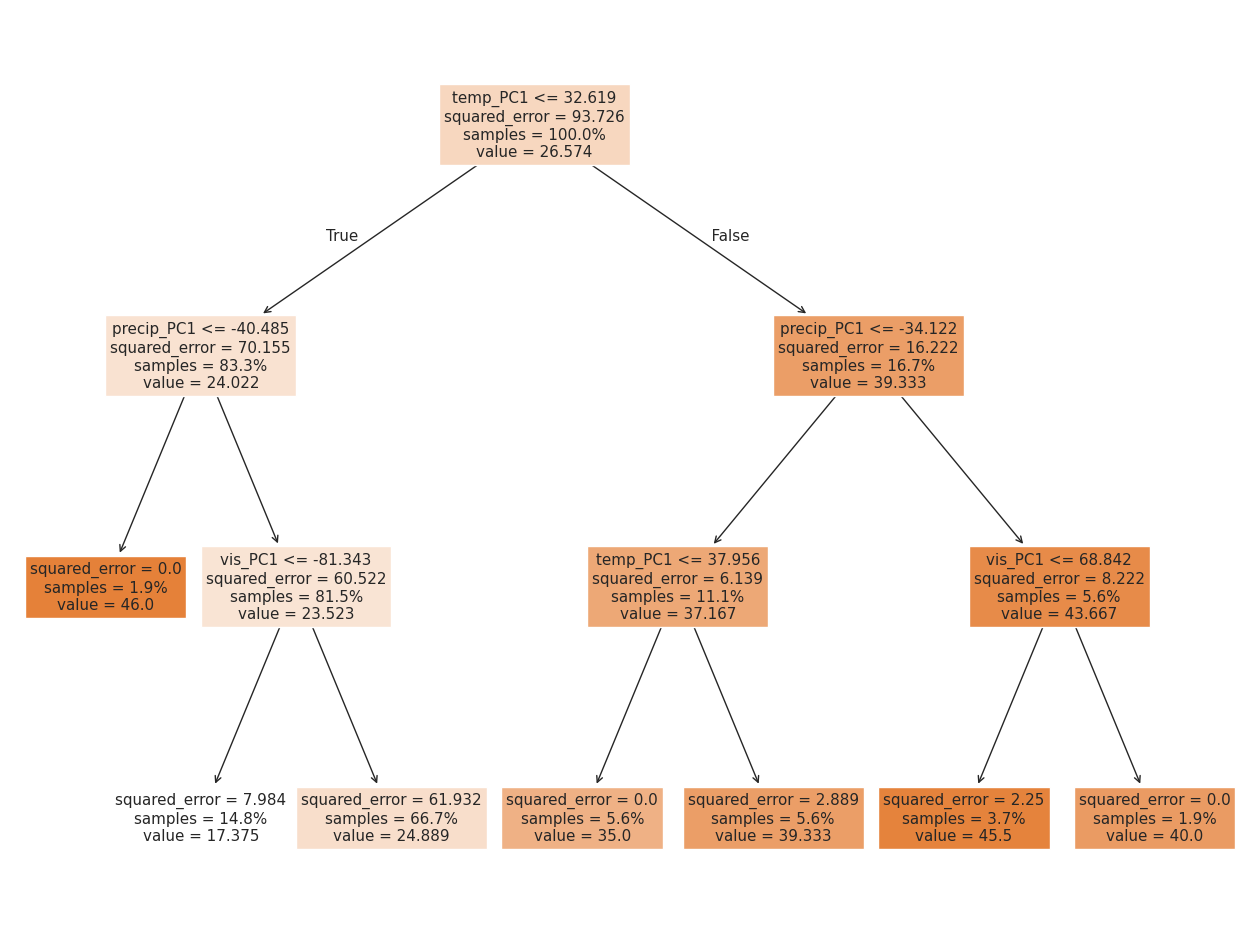

In [373]:
# Define the hyperparameter grid for Regression Tree
param_grid_tree = {
    "max_depth": [3, 4, 5, 7,],
    "min_samples_split": [2, 5, 7, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Initialize the Regression Tree model
regr = DecisionTreeRegressor(random_state=250)  # Added random_state for reproducibility

# Initialize GridSearchCV
grid_search_tree_pu = GridSearchCV(regr, param_grid_tree, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best hyperparameters for PU_ct
grid_search_tree_pu.fit(X_train, y_train['PU_ct'])  # Use unscaled data for tree-based models

# Get the best hyperparameter values for PU_ct
best_params_tree_pu = grid_search_tree_pu.best_params_

# Train the final Regression Tree model for PU_ct with the best hyperparameters
tree_pu = DecisionTreeRegressor(**best_params_tree_pu, random_state=250)
tree_pu.fit(X_train, y_train['PU_ct'])

# Fit classification tree.
regr = DecisionTreeRegressor(max_depth=3, random_state=42)
regr_model=regr.fit(X_train,y_train['PU_ct'])

# Predict on training and test data
y_train_pred_tree_pu = regr_model.predict(X_train)
y_test_pred_tree_pu = regr_model.predict(X_test)

# Visualize classification tree
fn = list(X_train.columns) # specify feature names
plt.figure(figsize = (16,12))
plot_tree(regr_model, feature_names = fn, filled = True, proportion=True);
# plt.savefig("tree.pdf")

print(f"Best parameters: {best_params_tree_pu}")

# Calculate MSE and R-squared
train_mse_tree_pu = mean_squared_error(y_train['PU_ct'], y_train_pred_tree_pu)
test_mse_tree_pu = mean_squared_error(y_test['PU_ct'], y_test_pred_tree_pu)
train_r2_tree_pu = r2_score(y_train['PU_ct'], y_train_pred_tree_pu)
test_r2_tree_pu = r2_score(y_test['PU_ct'], y_test_pred_tree_pu)

# Print results
print(f"Training MSE Regression Tree PU_ct: {train_mse_tree_pu:.4f}")
print(f"Test MSE Regression Tree PU_ct: {test_mse_tree_pu:.4f}")
print(f"Training R-squared Regression Tree PU_ct: {train_r2_tree_pu:.4f}")
print(f"Test R-squared Regression Tree PU_ct: {test_r2_tree_pu:.4f}")

## **Regression Tree - DROP-OFF**

Best parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training MSE Regression Tree DO_ct: 45.0615
Test MSE Regression Tree DO_ct: 167.5664
Training R-squared Regression Tree DO_ct: 0.5388
Test R-squared Regression Tree DO_ct: -0.9244


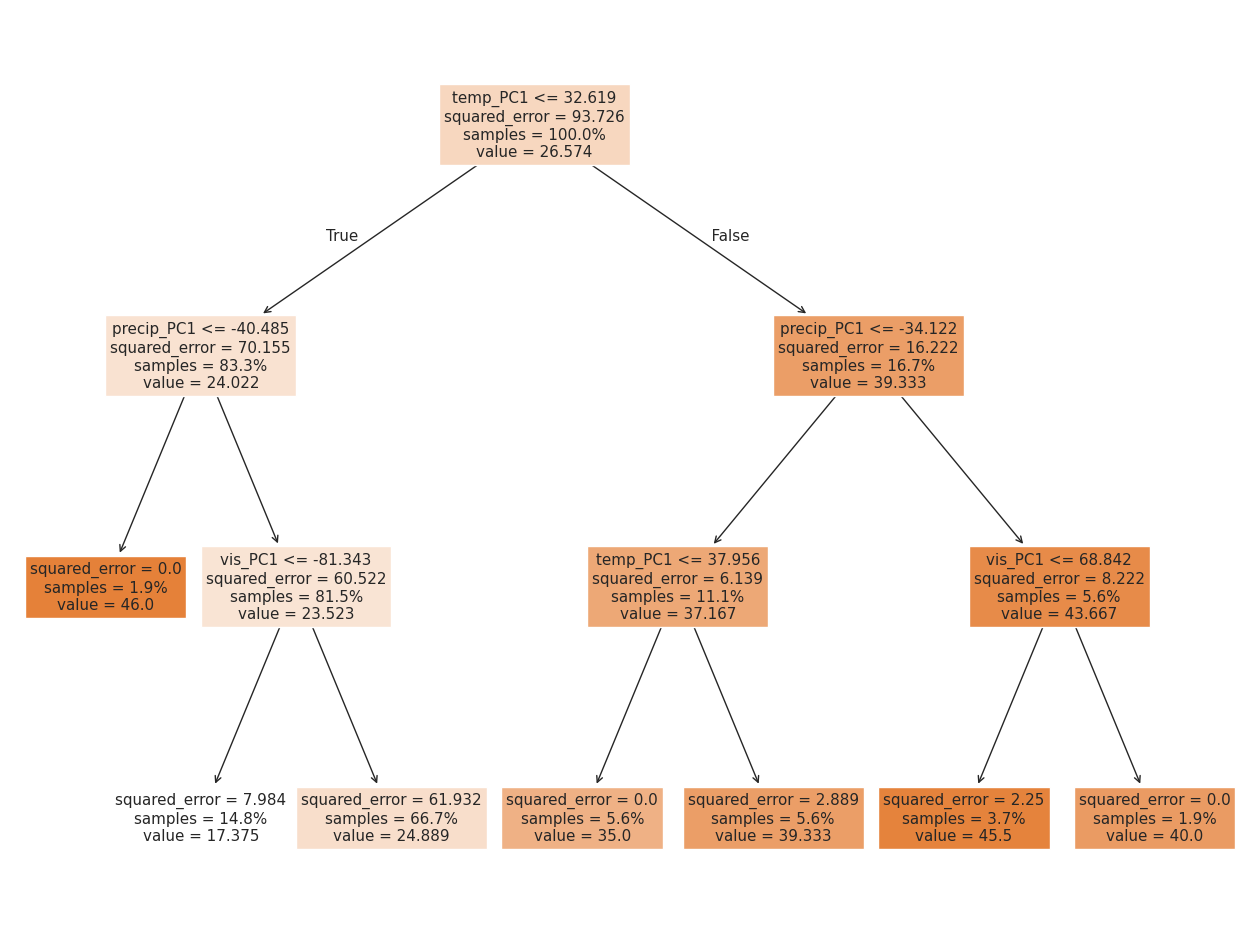

In [374]:
# Define the hyperparameter grid for Regression Tree
param_grid_tree = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize the Regression Tree model
regr = DecisionTreeRegressor(random_state=250)  # Added random_state for reproducibility

# Initialize GridSearchCV
grid_search_tree_do = GridSearchCV(regr, param_grid_tree, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best hyperparameters for DO_ct
grid_search_tree_do.fit(X_train, y_train['DO_ct'])  # Use unscaled data for tree-based models

# Get the best hyperparameter values for DO_ct
best_params_tree_do = grid_search_tree_do.best_params_

# Train the final Regression Tree model for DO_ct with the best hyperparameters
tree_do = DecisionTreeRegressor(**best_params_tree_do, random_state=250)
tree_do.fit(X_train, y_train['DO_ct'])

# Predict on training and test data
y_train_pred_tree_do = regr_model.predict(X_train)
y_test_pred_tree_do = regr_model.predict(X_test)

# Visualize classification tree
fn = list(X_train.columns) # specify feature names
plt.figure(figsize = (16,12))
plot_tree(regr_model, feature_names = fn, filled = True, proportion=True);
# plt.savefig("tree.pdf")

print(f"Best parameters: {best_params_tree_do}")

# Calculate MSE and R-squared
train_mse_tree_do = mean_squared_error(y_train['DO_ct'], y_train_pred_tree_do)
test_mse_tree_do = mean_squared_error(y_test['DO_ct'], y_test_pred_tree_do)
train_r2_tree_do = r2_score(y_train['DO_ct'], y_train_pred_tree_do)
test_r2_tree_do = r2_score(y_test['DO_ct'], y_test_pred_tree_do)

# Print results
print(f"Training MSE Regression Tree DO_ct: {train_mse_tree_do:.4f}")
print(f"Test MSE Regression Tree DO_ct: {test_mse_tree_do:.4f}")
print(f"Training R-squared Regression Tree DO_ct: {train_r2_tree_do:.4f}")
print(f"Test R-squared Regression Tree DO_ct: {test_r2_tree_do:.4f}")

## **Regression Tree - Out-of-Sample-Cost**

In [375]:
# Penalty values
alpha = 2  # Penalty for unsuccessful pickup
beta = 3   # Penalty for unsuccessful drop-off

min_total_cost = float('inf') #initialize minimum total cost
optimal_x, optimal_y = None, None #initialize optimal x and y

total_cost_test_y_all = []

# Loop through each test observation
for i in range(len(y_test_pred_tree_pu)):

    min_cost_i = float('inf')  # Local min for this observation
    best_x, best_y = None, None

    # Try all combinations of x and y such that x + y = 17
    for x in range(18):
        y = 17 - x

        # Predicted pickup/dropoff values
        # Accessing using array indexing instead of .iloc
        pu_pred = y_test_pred_tree_pu[i]
        do_pred = y_test_pred_tree_do[i]

        # Compute penalty cost
        cost = alpha * np.maximum(0, pu_pred - x) + beta * np.maximum(0, do_pred - y)

        if cost < min_cost_i:
            min_cost_i = cost
            best_x, best_y = x, y

    # Use best_x, best_y to compute actual test cost
    # Accessing using .iloc since y_test is a DataFrame
    pu_actual = y_test['PU_ct'].iloc[i]
    do_actual = y_test['DO_ct'].iloc[i]

    cost_actual = (
        alpha * np.maximum(0, pu_actual - best_x) +
        beta * np.maximum(0, do_actual - best_y)
    )

    total_cost_test_y_all.append(cost_actual)

# Compute average cost across test set
out_of_sample_avg_cost_tree = np.mean(total_cost_test_y_all)

print(f"Out-of-sample average cost in Regression Tree is ${out_of_sample_avg_cost_tree:.4f}")

Out-of-sample average cost in Regression Tree is $76.6389


# **KNN**

## **KNN - PICK-UP**

In [376]:
# Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Initialize the KNN model
knn = KNeighborsRegressor()

# Initialize GridSearchCV for KNN
grid_search_knn_pu = GridSearchCV(knn, param_grid_knn, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best hyperparameters for PU_ct
grid_search_knn_pu.fit(X_train_scaled, y_train['PU_ct'])

# Get the best hyperparameter values for PU_ct
best_params_knn_pu = grid_search_knn_pu.best_params_

# Train the final KNN model for PU_ct with the best hyperparameters
knn_model_pu = KNeighborsRegressor(**best_params_knn_pu)
knn_model_pu.fit(X_train_scaled, y_train['PU_ct'])

# Predict on training and test sets
y_train_pred_knn_pu = knn_model_pu.predict(X_train_scaled)
y_test_pred_knn_pu = knn_model_pu.predict(X_test_scaled)

# Calculate MSE and R-squared
train_mse_knn_pu = mean_squared_error(y_train['PU_ct'], y_train_pred_knn_pu)
test_mse_knn_pu = mean_squared_error(y_test['PU_ct'], y_test_pred_knn_pu)
train_r2_knn_pu = r2_score(y_train['PU_ct'], y_train_pred_knn_pu)
test_r2_knn_pu = r2_score(y_test['PU_ct'], y_test_pred_knn_pu)

# Print results
print(f"Best hyperparameters for KNN (PU_ct): {best_params_knn_pu}")
print(f"Training MSE KNN Regression PU_ct: {train_mse_knn_pu:.4f}")
print(f"Test MSE KNN Regression PU_ct: {test_mse_knn_pu:.4f}")
print(f"Training R-squared KNN Regression PU_ct: {train_r2_knn_pu:.4f}")
print(f"Test R-squared KNN Regression PU_ct: {test_r2_knn_pu:.4f}")

Best hyperparameters for KNN (PU_ct): {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Training MSE KNN Regression PU_ct: 61.2695
Test MSE KNN Regression PU_ct: 59.3253
Training R-squared KNN Regression PU_ct: 0.3463
Test R-squared KNN Regression PU_ct: 0.2920


## **KNN - DROP-OFF**

In [377]:
# Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for KNN (can be the same as for PU_ct)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model
knn = KNeighborsRegressor()

# Initialize GridSearchCV for KNN
grid_search_knn_do = GridSearchCV(knn, param_grid_knn, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best hyperparameters for DO_ct
grid_search_knn_do.fit(X_train_scaled, y_train['DO_ct'])

# Get the best hyperparameter values for DO_ct
best_params_knn_do = grid_search_knn_do.best_params_

# Train the final KNN model for DO_ct with the best hyperparameters
knn_model_do = KNeighborsRegressor(**best_params_knn_do)
knn_model_do.fit(X_train_scaled, y_train['DO_ct'])

# Predict on training and test sets
y_train_pred_knn_do = knn_model_do.predict(X_train_scaled)
y_test_pred_knn_do = knn_model_do.predict(X_test_scaled)

# Calculate MSE and R-squared
train_mse_knn_do = mean_squared_error(y_train['DO_ct'], y_train_pred_knn_do)
test_mse_knn_do = mean_squared_error(y_test['DO_ct'], y_test_pred_knn_do)
train_r2_knn_do = r2_score(y_train['DO_ct'], y_train_pred_knn_do)
test_r2_knn_do = r2_score(y_test['DO_ct'], y_test_pred_knn_do)

# Print results
print(f"Best hyperparameters for KNN (DO_ct): {best_params_knn_do}")
print(f"Training MSE KNN Regression DO_ct: {train_mse_knn_do:.4f}")
print(f"Test MSE KNN Regression DO_ct: {test_mse_knn_do:.4f}")
print(f"Training R-squared KNN Regression DO_ct: {train_r2_knn_do:.4f}")
print(f"Test R-squared KNN Regression DO_ct: {test_r2_knn_do:.4f}")

Best hyperparameters for KNN (DO_ct): {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Training MSE KNN Regression DO_ct: 62.3721
Test MSE KNN Regression DO_ct: 70.8712
Training R-squared KNN Regression DO_ct: 0.3616
Test R-squared KNN Regression DO_ct: 0.1861


## **KNN - Out-of-Sample-Cost**

In [378]:
# Penalty values
alpha = 2  # Penalty for unsuccessful pickup
beta = 3   # Penalty for unsuccessful drop-off

min_total_cost = float('inf') #initialize minimum total cost
optimal_x, optimal_y = None, None #initialize optimal x and y

total_cost_test_y_all = []

# Loop through each test observation
for i in range(len(y_test_pred_knn_pu)):

    min_cost_i = float('inf')  # Local min for this observation
    best_x, best_y = None, None

    # Try all combinations of x and y such that x + y = 17
    for x in range(18):
        y = 17 - x

        # Predicted pickup/dropoff values
        # Accessing using array indexing instead of .iloc
        pu_pred = y_test_pred_knn_pu[i]
        do_pred = y_test_pred_knn_do[i]

        # Compute penalty cost
        cost = alpha * np.maximum(0, pu_pred - x) + beta * np.maximum(0, do_pred - y)

        if cost < min_cost_i:
            min_cost_i = cost
            best_x, best_y = x, y

    # Use best_x, best_y to compute actual test cost
    # Accessing using .iloc since y_test is a DataFrame
    pu_actual = y_test['PU_ct'].iloc[i]
    do_actual = y_test['DO_ct'].iloc[i]

    cost_actual = (
        alpha * np.maximum(0, pu_actual - best_x) +
        beta * np.maximum(0, do_actual - best_y)
    )

    total_cost_test_y_all.append(cost_actual)

# Compute average cost across test set
out_of_sample_avg_cost_knn = np.mean(total_cost_test_y_all)

print(f"Out-of-sample average cost in KNN is ${out_of_sample_avg_cost_knn:.4f}")

Out-of-sample average cost in KNN is $76.6389


# **RANDOM FOREST**

## **Random Forest - PICK-UP**

In [379]:
# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=250)

# Initialize GridSearchCV
grid_search_rf_pu = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best hyperparameters for PU_ct
grid_search_rf_pu.fit(X_train, y_train['PU_ct'])

# Get the best hyperparameter values for PU_ct
best_params_rf_pu = grid_search_rf_pu.best_params_

# Train the final RF model for PU_ct with the best hyperparameters
rf_pu = RandomForestRegressor(**best_params_rf_pu, random_state=250)
rf_pu.fit(X_train, y_train['PU_ct'])

# Predict on training and test data
y_train_pred_rf_pu = rf_pu.predict(X_train)
y_test_pred_rf_pu = rf_pu.predict(X_test)

# Calculate MSE for training and test sets
train_mse_rf_pu = mean_squared_error(y_train['PU_ct'], y_train_pred_rf_pu)
test_mse_rf_pu = mean_squared_error(y_test['PU_ct'], y_test_pred_rf_pu)

# Calculate R-squared for training and test sets
train_r2_rf_pu = r2_score(y_train['PU_ct'], y_train_pred_rf_pu)
test_r2_rf_pu = r2_score(y_test['PU_ct'], y_test_pred_rf_pu)

# Print the results
print(f"Best hyperparameters for Random Forest (PU_ct): {best_params_rf_pu}")
print(f"Training MSE Random Forest - PU_ct: {train_mse_rf_pu:.4f}")
print(f"Test MSE Random Forest - PU_ct: {test_mse_rf_pu:.4f}")
print(f"Training R-squared Random Forest - PU_ct: {train_r2_rf_pu:.4f}")
print(f"Test R-squared Random Forest - PU_ct: {test_r2_rf_pu:.4f}")

Best hyperparameters for Random Forest (PU_ct): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Training MSE Random Forest - PU_ct: 21.1962
Test MSE Random Forest - PU_ct: 72.7813
Training R-squared Random Forest - PU_ct: 0.7738
Test R-squared Random Forest - PU_ct: 0.1314


## **Random Forest - DROP-OFF**

In [380]:
# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=250)

# Initialize GridSearchCV
grid_search_rf_do = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best hyperparameters for DO_ct
grid_search_rf_do.fit(X_train, y_train['DO_ct'])

# Get the best hyperparameter values for DO_ct
best_params_rf_do = grid_search_rf_do.best_params_

# Train the final RF model for DO_ct with the best hyperparameters
rf_do = RandomForestRegressor(**best_params_rf_do, random_state=250)
rf_do.fit(X_train, y_train['DO_ct'])

# Predict on training and test data
y_train_pred_rf_do = rf_do.predict(X_train)
y_test_pred_rf_do = rf_do.predict(X_test)

# Calculate MSE for training and test sets
train_mse_rf_do = mean_squared_error(y_train['DO_ct'], y_train_pred_rf_do)
test_mse_rf_do = mean_squared_error(y_test['DO_ct'], y_test_pred_rf_do)

# Calculate R-squared for training and test sets
train_r2_rf_do = r2_score(y_train['DO_ct'], y_train_pred_rf_do)
test_r2_rf_do = r2_score(y_test['DO_ct'], y_test_pred_rf_do)

# Print the results
print(f"Best hyperparameters for Random Forest (DO_ct): {best_params_rf_do}")
print(f"Training MSE Random Forest - DO_ct : {train_mse_rf_do:.4f}")
print(f"Test MSE Random Forest - DO_ct : {test_mse_rf_do:.4f}")
print(f"Training R-squared Random Forest - DO_ct : {train_r2_rf_do:.4f}")
print(f"Test R-squared Random Forest - DO_ct : {test_r2_rf_do:.4f}")

Best hyperparameters for Random Forest (DO_ct): {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Training MSE Random Forest - DO_ct : 40.4538
Test MSE Random Forest - DO_ct : 76.3468
Training R-squared Random Forest - DO_ct : 0.5860
Test R-squared Random Forest - DO_ct : 0.1232


## **Random Forest - Out-of-Sample-Cost**

In [381]:
# Penalty values
alpha = 2  # Penalty for unsuccessful pickup
beta = 3   # Penalty for unsuccessful drop-off

min_total_cost = float('inf') #initialize minimum total cost
optimal_x, optimal_y = None, None #initialize optimal x and y

total_cost_test_y_all = []

# Loop through each test observation
for i in range(len(y_test_pred_rf_pu)):

    min_cost_i = float('inf')  # Local min for this observation
    best_x, best_y = None, None

    # Try all combinations of x and y such that x + y = 17
    for x in range(18):
        y = 17 - x

        # Predicted pickup/dropoff values
        # Accessing using array indexing instead of .iloc
        pu_pred = y_test_pred_rf_pu[i]
        do_pred = y_test_pred_rf_do[i]

        # Compute penalty cost
        cost = alpha * np.maximum(0, pu_pred - x) + beta * np.maximum(0, do_pred - y)

        if cost < min_cost_i:
            min_cost_i = cost
            best_x, best_y = x, y

    # Use best_x, best_y to compute actual test cost
    # Accessing using .iloc since y_test is a DataFrame
    pu_actual = y_test['PU_ct'].iloc[i]
    do_actual = y_test['DO_ct'].iloc[i]

    cost_actual = (
        alpha * np.maximum(0, pu_actual - best_x) +
        beta * np.maximum(0, do_actual - best_y)
    )

    total_cost_test_y_all.append(cost_actual)

# Compute average cost across test set
out_of_sample_avg_cost_rf = np.mean(total_cost_test_y_all)

print(f"Out-of-sample average cost in Random Forest is ${out_of_sample_avg_cost_rf:.4f}")

Out-of-sample average cost in Random Forest is $76.6389


# **GRADIENT BOOSTING**

## **Gradient Boosting - PICK-UP**

In [382]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting model
gb = GradientBoostingRegressor(random_state=0)

# Initialize GridSearchCV
grid_search_gb_pu = GridSearchCV(gb, param_grid_gb, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best hyperparameters for PU_ct
grid_search_gb_pu.fit(X_train, y_train['PU_ct'])

# Get the best hyperparameter values for PU_ct
best_params_gb_pu = grid_search_gb_pu.best_params_

#Train the final GB model for PU_ct with the best hyperparameters
regr_GB_pu = GradientBoostingRegressor(**best_params_gb_pu, random_state=0)
regr_GB_pu.fit(X_train, y_train['PU_ct'])

# Predict on training and test data
y_train_pred_GB_pu = regr_GB_pu.predict(X_train)
y_test_pred_GB_pu = regr_GB_pu.predict(X_test)

# Calculate MSE for training and test sets
train_mse_GB_pu = mean_squared_error(y_train['PU_ct'], y_train_pred_GB_pu)
test_mse_GB_pu = mean_squared_error(y_test['PU_ct'], y_test_pred_GB_pu)

# Calculate R-squared for training and test sets
train_r2_GB_pu = r2_score(y_train['PU_ct'], y_train_pred_GB_pu)
test_r2_GB_pu = r2_score(y_test['PU_ct'], y_test_pred_GB_pu)

# Print the results
print(f"Best hyperparameters for Gradient Boosting (PU_ct): {best_params_gb_pu}")
print(f"Training MSE Gradient Boosting PU_ct: {train_mse_GB_pu:.4f}")
print(f"Test MSE Gradient Boosting PU_ct: {test_mse_GB_pu:.4f}")
print(f"Training R-squared Gradient Boosting PU_ct: {train_r2_GB_pu:.4f}")
print(f"Test R-squared Gradient Boosting PU_ct: {test_r2_GB_pu:.4f}")

Best hyperparameters for Gradient Boosting (PU_ct): {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Training MSE Gradient Boosting PU_ct: 11.8773
Test MSE Gradient Boosting PU_ct: 92.2931
Training R-squared Gradient Boosting PU_ct: 0.8733
Test R-squared Gradient Boosting PU_ct: -0.1014


## **Gradient Boosting - DROP-OFF**

In [384]:
# Define the hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize the Gradient Boosting model
gb = GradientBoostingRegressor(random_state=250)

# Initialize GridSearchCV
grid_search_gb_do = GridSearchCV(gb, param_grid_gb, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best hyperparameters for DO_ct
grid_search_gb_do.fit(X_train, y_train['DO_ct'])  # Changed target variable to DO_ct

# Get the best hyperparameter values for DO_ct
best_params_gb_do = grid_search_gb_do.best_params_

# Train the final GB model for DO_ct with the best hyperparameters
regr_GB_do = GradientBoostingRegressor(**best_params_gb_do, random_state=0)
regr_GB_do.fit(X_train, y_train['DO_ct'])  # Changed target variable to DO_ct

# Predict on training and test data
y_train_pred_GB_do = regr_GB_do.predict(X_train)
y_test_pred_GB_do = regr_GB_do.predict(X_test)

# Calculate MSE for training and test sets
train_mse_GB_do = mean_squared_error(y_train['DO_ct'], y_train_pred_GB_do)
test_mse_GB_do = mean_squared_error(y_test['DO_ct'], y_test_pred_GB_do)

# Calculate R-squared for training and test sets
train_r2_GB_do = r2_score(y_train['DO_ct'], y_train_pred_GB_do)
test_r2_GB_do = r2_score(y_test['DO_ct'], y_test_pred_GB_do)

# Print the results
print(f"Best hyperparameters for Gradient Boosting (DO_ct): {best_params_gb_do}")
print(f"Training MSE Gradient Boosting DO_ct: {train_mse_GB_do:.4f}")
print(f"Test MSE Gradient Boosting DO_ct: {test_mse_GB_do:.4f}")
print(f"Training R-squared Gradient Boosting DO_ct: {train_r2_GB_do:.4f}")
print(f"Test R-squared Gradient Boosting DO_ct: {test_r2_GB_do:.4f}")

Best hyperparameters for Gradient Boosting (DO_ct): {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training MSE Gradient Boosting DO_ct: 34.7620
Test MSE Gradient Boosting DO_ct: 100.1938
Training R-squared Gradient Boosting DO_ct: 0.6442
Test R-squared Gradient Boosting DO_ct: -0.1506


## **Gradient Boosting - Out-of-Sample-Cost**

In [394]:
# Penalty values
alpha = 2  # Penalty for unsuccessful pickup
beta = 3   # Penalty for unsuccessful drop-off

min_total_cost = float('inf') #initialize minimum total cost
optimal_x, optimal_y = None, None #initialize optimal x and y

total_cost_test_y_all = []

# Loop through each test observation
for i in range(len(y_test_pred_GB_pu)):

    min_cost_i = float('inf')  # Local min for this observation
    best_x, best_y = None, None

    # Try all combinations of x and y such that x + y = 17
    for x in range(18):
        y = 17 - x

        # Predicted pickup/dropoff values
        # Accessing using array indexing instead of .iloc
        pu_pred = y_test_pred_GB_pu[i]
        do_pred = y_test_pred_GB_do[i]

        # Compute penalty cost
        cost = alpha * np.maximum(0, pu_pred - x) + beta * np.maximum(0, do_pred - y)

        if cost < min_cost_i:
            min_cost_i = cost
            best_x, best_y = x, y

    # Use best_x, best_y to compute actual test cost
    # Accessing using .iloc since y_test is a DataFrame
    pu_actual = y_test['PU_ct'].iloc[i]
    do_actual = y_test['DO_ct'].iloc[i]

    cost_actual = (
        alpha * np.maximum(0, pu_actual - best_x) +
        beta * np.maximum(0, do_actual - best_y)
    )

    total_cost_test_y_all.append(cost_actual)

# Compute average cost across test set
out_of_sample_avg_cost_GB = np.mean(total_cost_test_y_all)

print(f"Out-of-sample average cost in Gradient Boosting is ${out_of_sample_avg_cost_GB:.4f}")

Out-of-sample average cost in Gradient Boosting is $76.6389


# **NEURAL NETWORKS**

## **Neural Networks - PICK-UP**

In [386]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the hyperparameter grid for MLPRegressor
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Different hidden layer architectures
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimization algorithms
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
}

# Initialize the MLPRegressor model
nn = MLPRegressor(max_iter=100, random_state=42, early_stopping=True)

# Initialize GridSearchCV
grid_search_nn_pu = GridSearchCV(nn, param_grid_nn, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best hyperparameters for PU_ct
grid_search_nn_pu.fit(X_train_scaled, y_train['PU_ct'])

# Get the best hyperparameter values for PU_ct
best_params_nn_pu = grid_search_nn_pu.best_params_

# Train the final MLPRegressor model for PU_ct with the best hyperparameters
regr_nn_pu = MLPRegressor(**best_params_nn_pu, max_iter=1000, random_state=42)
regr_nn_pu.fit(X_train_scaled, y_train['PU_ct'])

# Predict on training and test data
y_train_pred_nn_pu = regr_nn_pu.predict(X_train_scaled)
y_test_pred_nn_pu = regr_nn_pu.predict(X_test_scaled)

# Calculate MSE for training and test sets
train_mse_nn_pu = mean_squared_error(y_train['PU_ct'], y_train_pred_nn_pu)
test_mse_nn_pu = mean_squared_error(y_test['PU_ct'], y_test_pred_nn_pu)

# Calculate R-squared for training and test sets
train_r2_nn_pu = r2_score(y_train['PU_ct'], y_train_pred_nn_pu)
test_r2_nn_pu = r2_score(y_test['PU_ct'], y_test_pred_nn_pu)

# Print the results
print(f"Best hyperparameters for Neural Networks (PU_ct): {best_params_nn_pu}")
print(f"Training MSE Neural Networks - PU_ct: {train_mse_nn_pu:.4f}")
print(f"Test MSE Neural Networks - PU_ct: {test_mse_nn_pu:.4f}")
print(f"Training R-squared Neural Networks - PU_ct: {train_r2_nn_pu:.4f}")
print(f"Test R-squared Neural Networks - PU_ct: {test_r2_nn_pu:.4f}")


Best hyperparameters for Neural Networks (PU_ct): {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
Training MSE Neural Networks - PU_ct: 65.1216
Test MSE Neural Networks - PU_ct: 79.2685
Training R-squared Neural Networks - PU_ct: 0.3052
Test R-squared Neural Networks - PU_ct: 0.0540


## **Neural Networks - DROP-OFF**

In [388]:
# Define the hyperparameter grid for MLPRegressor (same as for PU_ct)
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Initialize the MLPRegressor model
nn = MLPRegressor(max_iter=1000, random_state=42, early_stopping=True)

# Initialize GridSearchCV
grid_search_nn_do = GridSearchCV(nn, param_grid_nn, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to find the best hyperparameters for DO_ct
grid_search_nn_do.fit(X_train_scaled, y_train['DO_ct'])  # Changed target variable to DO_ct

# Get the best hyperparameter values for DO_ct
best_params_nn_do = grid_search_nn_do.best_params_

# Train the final MLPRegressor model for DO_ct with the best hyperparameters
regr_nn_do = MLPRegressor(**best_params_nn_do, max_iter=1000, random_state=42)
regr_nn_do.fit(X_train_scaled, y_train['DO_ct'])  # Changed target variable to DO_ct

# Predict on training and test data
y_train_pred_nn_do = regr_nn_do.predict(X_train_scaled)
y_test_pred_nn_do = regr_nn_do.predict(X_test_scaled)

# Calculate MSE for training and test sets
train_mse_nn_do = mean_squared_error(y_train['DO_ct'], y_train_pred_nn_do)
test_mse_nn_do = mean_squared_error(y_test['DO_ct'], y_test_pred_nn_do)

# Calculate R-squared for training and test sets
train_r2_nn_do = r2_score(y_train['DO_ct'], y_train_pred_nn_do)
test_r2_nn_do = r2_score(y_test['DO_ct'], y_test_pred_nn_do)

# Print the results
print(f"Best hyperparameters for Neural Networks (DO_ct): {best_params_nn_do}")
print(f"Training MSE Neural Networks - DO_ct: {train_mse_nn_do:.4f}")
print(f"Test MSE Neural Networks - DO_ct: {test_mse_nn_do:.4f}")
print(f"Training R-squared Neural Networks - DO_ct: {train_r2_nn_do:.4f}")
print(f"Test R-squared Neural Networks - DO_ct: {test_r2_nn_do:.4f}")

Best hyperparameters for Neural Networks (DO_ct): {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
Training MSE Neural Networks - DO_ct: 70.8219
Test MSE Neural Networks - DO_ct: 106.9631
Training R-squared Neural Networks - DO_ct: 0.2751
Test R-squared Neural Networks - DO_ct: -0.2284


## **Neural Networks - Out-of-Sample-Cost**

In [389]:
# Penalty values
alpha = 2  # Penalty for unsuccessful pickup
beta = 3   # Penalty for unsuccessful drop-off

min_total_cost = float('inf') #initialize minimum total cost
optimal_x, optimal_y = None, None #initialize optimal x and y

total_cost_test_y_all = []

# Loop through each test observation
for i in range(len(y_test_pred_nn_pu)):

    min_cost_i = float('inf')  # Local min for this observation
    best_x, best_y = None, None

    # Try all combinations of x and y such that x + y = 17
    for x in range(18):
        y = 17 - x

        # Predicted pickup/dropoff values
        # Accessing using array indexing instead of .iloc
        pu_pred = y_test_pred_nn_pu[i]
        do_pred = y_test_pred_nn_do[i]

        # Compute penalty cost
        cost = alpha * np.maximum(0, pu_pred - x) + beta * np.maximum(0, do_pred - y)

        if cost < min_cost_i:
            min_cost_i = cost
            best_x, best_y = x, y

    # Use best_x, best_y to compute actual test cost
    # Accessing using .iloc since y_test is a DataFrame
    pu_actual = y_test['PU_ct'].iloc[i]
    do_actual = y_test['DO_ct'].iloc[i]

    cost_actual = (
        alpha * np.maximum(0, pu_actual - best_x) +
        beta * np.maximum(0, do_actual - best_y)
    )

    total_cost_test_y_all.append(cost_actual)

# Compute average cost across test set
out_of_sample_avg_cost_nn = np.mean(total_cost_test_y_all)

print(f"Out-of-sample average cost in Neural Networks is ${out_of_sample_avg_cost_nn:.4f}")

Out-of-sample average cost in Neural Networks is $76.6389


# **PERFORMANCE EVALUATION OF MODELS**

In [393]:
# Create a dictionary to store the results
results = {
    'Model': ['Linear Regression', 'LASSO', 'Ridge Regression', 'Elastic Net', 'Regression Tree', 'KNN', 'Random Forest', 'Gradient Boosting', 'Neural Networks'],
    'Train MSE (PU_ct)': [train_mse_mlr_pu, train_mse_lasso_pu, train_mse_ridge_pu, train_mse_en_pu, train_mse_tree_pu, train_mse_knn_pu, train_mse_rf_pu, train_mse_GB_pu, train_mse_nn_pu],
    'Test MSE (PU_ct)': [test_mse_mlr_pu, test_mse_lasso_pu, test_mse_ridge_pu, test_mse_en_pu, test_mse_tree_pu, test_mse_knn_pu, test_mse_rf_pu, test_mse_GB_pu, test_mse_nn_pu],
    'Train R^2 (PU_ct)': [train_r2_mlr_pu, train_r2_lasso_pu, train_r2_ridge_pu, train_r2_en_pu, train_r2_tree_pu, train_r2_knn_pu, train_r2_rf_pu, train_r2_GB_pu, train_r2_nn_pu],
    'Test R^2 (PU_ct)': [test_r2_mlr_pu, test_r2_lasso_pu, test_r2_ridge_pu, test_r2_en_pu, test_r2_tree_pu, test_r2_knn_pu, test_r2_rf_pu, test_r2_GB_pu, test_r2_nn_pu],
    'Train MSE (DO_ct)': [train_mse_mlr_do, train_mse_lasso_do, train_mse_ridge_do, train_mse_en_do, train_mse_tree_do, train_mse_knn_do, train_mse_rf_do, train_mse_GB_do, train_mse_nn_do],
    'Test MSE (DO_ct)': [test_mse_mlr_do, test_mse_lasso_do, test_mse_ridge_do, test_mse_en_do, test_mse_tree_do, test_mse_knn_do, test_mse_rf_do, test_mse_GB_do, test_mse_nn_do],
    'Train R^2 (DO_ct)': [train_r2_mlr_do, train_r2_lasso_do, train_r2_ridge_do, train_r2_en_do, train_r2_tree_do, train_r2_knn_do, train_r2_rf_do, train_r2_GB_do, train_r2_nn_do],
    'Test R^2 (DO_ct)': [test_r2_mlr_do, test_r2_lasso_do, test_r2_ridge_do, test_r2_en_do, test_r2_tree_do, test_r2_knn_do, test_r2_rf_do, test_r2_GB_do, test_r2_nn_do],
    'Out-of-sample Cost': [out_of_sample_avg_cost_mlr, out_of_sample_avg_cost_lasso, out_of_sample_avg_cost_ridge, out_of_sample_avg_cost_en, out_of_sample_avg_cost_tree, out_of_sample_avg_cost_knn, out_of_sample_avg_cost_rf, out_of_sample_avg_cost_GB, out_of_sample_avg_cost_nn]
}

# Create a pandas DataFrame from the results dictionary
results_df = pd.DataFrame(results)

from IPython.display import display, HTML
# Apply formatting to numeric columns
for col in results_df.select_dtypes(include=['number']).columns:
    results_df[col] = results_df[col].map('{:.4f}'.format)

# Basic HTML styling
styled_table = results_df.to_html(classes='table table-bordered table-hover', justify='center')
display(HTML(styled_table))

,Model,Train MSE (PU_ct),Test MSE (PU_ct),Train R^2 (PU_ct),Test R^2 (PU_ct),Train MSE (DO_ct),Test MSE (DO_ct),Train R^2 (DO_ct),Test R^2 (DO_ct),Out-of-sample Cost
0,Linear Regression,56.2071,55.5805,0.4003,0.3367,58.0363,69.5466,0.4060,0.2013,76.6389
1,LASSO,58.1256,59.4939,0.3798,0.2900,60.4860,70.4646,0.3809,0.1908,76.6389
2,Ridge Regression,56.8039,56.3761,0.3939,0.3272,58.6145,69.5842,0.4001,0.2009,76.6389
3,Elastic Net,58.9533,60.0218,0.3710,0.2837,60.5701,70.5515,0.3801,0.1898,76.6389
4,Regression Tree,42.7148,140.6536,0.5443,-0.6786,45.0615,167.5664,0.5388,-0.9244,76.6389
5,KNN,61.2695,59.3253,0.3463,0.2920,62.3721,70.8712,0.3616,0.1861,76.6389
6,Random Forest,21.1962,72.7813,0.7738,0.1314,40.4538,76.3468,0.5860,0.1232,76.6389
7,Gradient Boosting,11.8773,92.2931,0.8733,-0.1014,34.7620,100.1938,0.6442,-0.1506,76.6389
8,Neural Networks,65.1216,79.2685,0.3052,0.0540,70.8219,106.9631,0.2751,-0.2284,76.6389


## **In-Sample Performance**

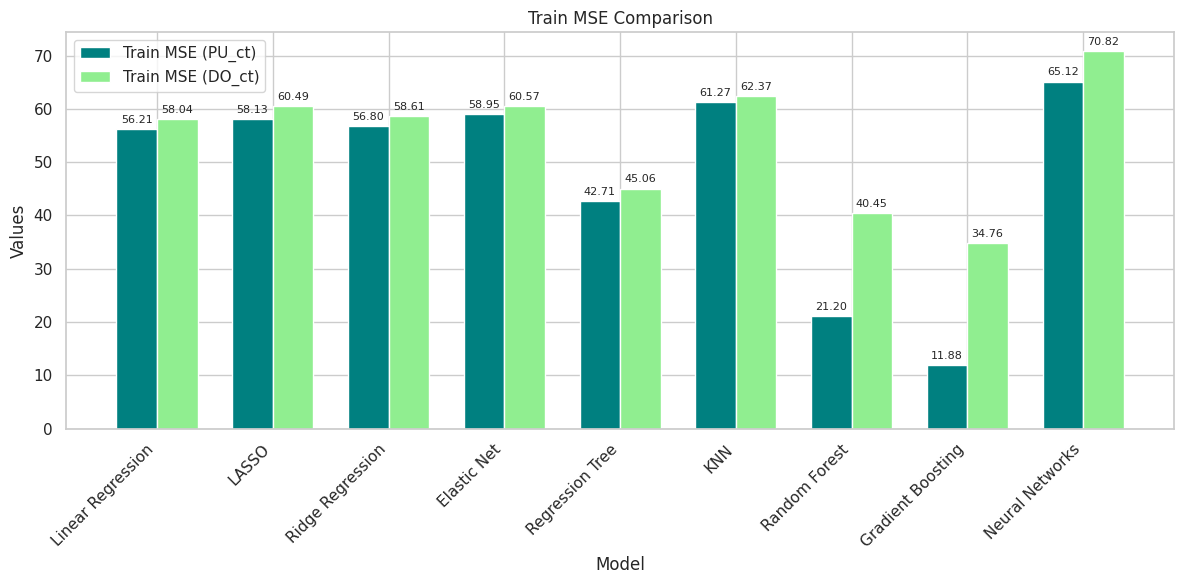

In [395]:
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35  # Adjust width as needed
index = np.arange(len(results_df['Model']))

# Bar plots for Train MSE (PU_ct) and Train MSE (DO_ct)
bar1 = ax.bar(index, results_df['Train MSE (PU_ct)'].astype(float), bar_width, label='Train MSE (PU_ct)', color = 'teal')
bar2 = ax.bar(index + bar_width, results_df['Train MSE (DO_ct)'].astype(float), bar_width, label='Train MSE (DO_ct)', color = 'lightgreen')

ax.set_xlabel('Model')
ax.set_ylabel('Values')
ax.set_title('Train MSE Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()

def autolabel(bars, ax=None):
    """Attach a text label above each bar displaying its height."""
    if ax is None:
        ax = plt.gca()
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
autolabel(bar1)
autolabel(bar2)

plt.tight_layout()
plt.show()

## **Out-of-Sample Performance**

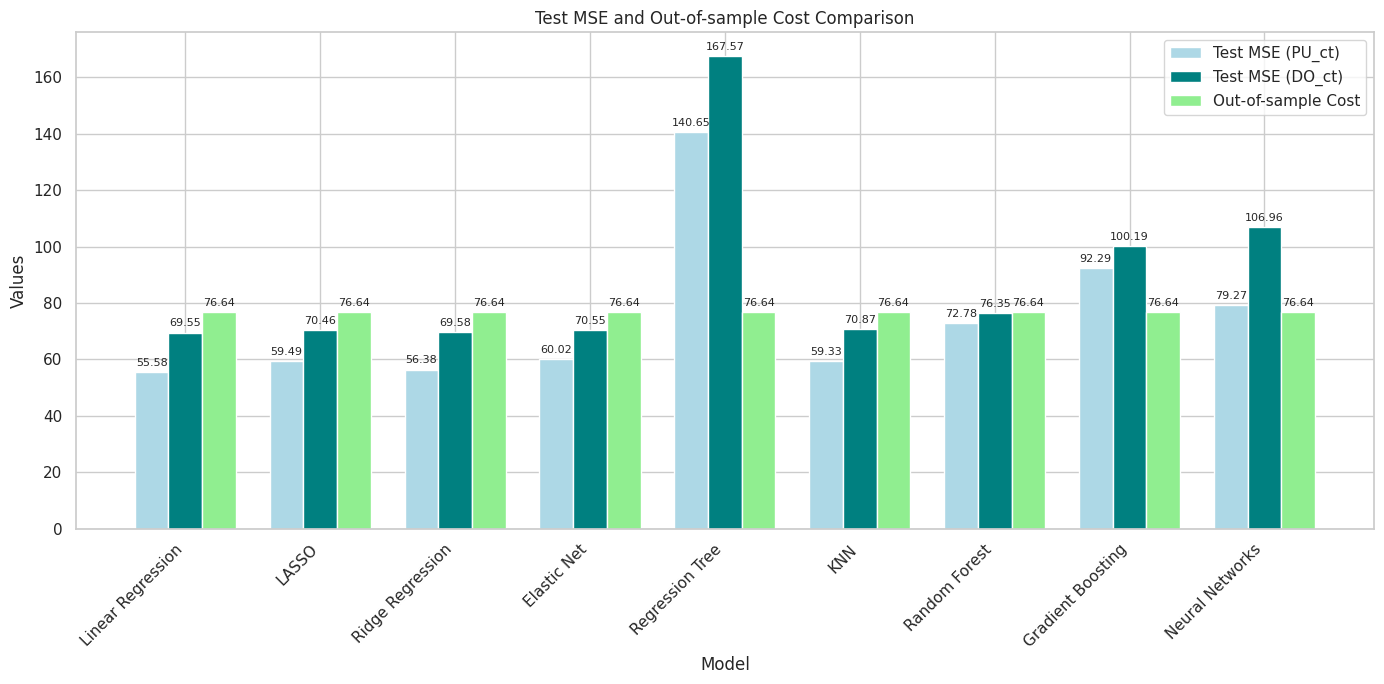

In [396]:
fig, ax = plt.subplots(figsize=(14, 7))

bar_width = 0.25
index = np.arange(len(results_df['Model']))

# Bar plots for Test MSE (PU_ct), Test MSE (DO_ct), and Out-of-sample Cost
bar1 = ax.bar(index, results_df['Test MSE (PU_ct)'].astype(float), bar_width, label='Test MSE (PU_ct)', color = 'lightblue')
bar2 = ax.bar(index + bar_width, results_df['Test MSE (DO_ct)'].astype(float), bar_width, label='Test MSE (DO_ct)', color = 'teal')
bar3 = ax.bar(index + 2 * bar_width, results_df['Out-of-sample Cost'].astype(float), bar_width, label='Out-of-sample Cost', color = 'lightgreen')

ax.set_xlabel('Model')
ax.set_ylabel('Values')
ax.set_title('Test MSE and Out-of-sample Cost Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.tight_layout()
plt.show()

### **Average Test MSE to choose best predictive performance model**

               Model  Avg Train MSE  Avg Test MSE
0  Linear Regression      57.121683     62.563530
1              LASSO      59.305784     64.979218
2   Ridge Regression      57.709232     62.980146
3        Elastic Net      59.761697     65.286666
4    Regression Tree      43.888117    154.110023
5                KNN      61.820784     65.098255
6      Random Forest      30.824986     74.564043
7  Gradient Boosting      23.319651     96.243421
8    Neural Networks      67.971745     93.115798


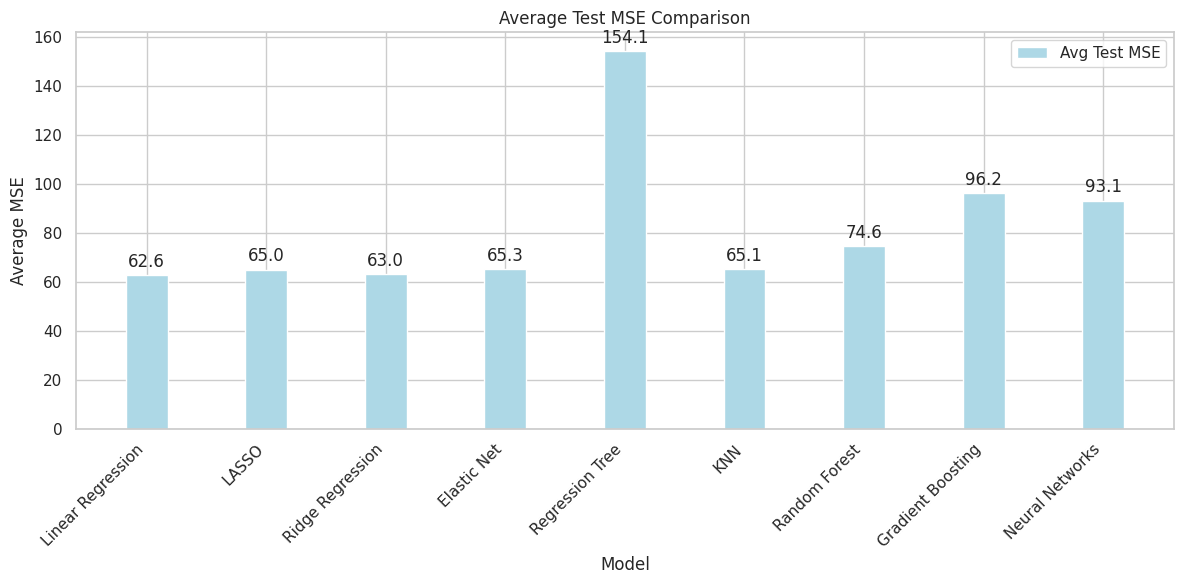

In [397]:
# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Calculate the average MSE for PU_ct and DO_ct for both train and test sets
results_df['Avg Train MSE'] = (results_df['Train MSE (PU_ct)'] + results_df['Train MSE (DO_ct)']) / 2
results_df['Avg Test MSE'] = (results_df['Test MSE (PU_ct)'] + results_df['Test MSE (DO_ct)']) / 2

# Display the results
print(results_df[['Model', 'Avg Train MSE', 'Avg Test MSE']])

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(results_df['Model']))

# Bar plot for Avg Test MSE
bar1 = ax.bar(index, results_df['Avg Test MSE'], bar_width, label='Avg Test MSE', color='lightblue')


ax.set_xlabel('Model')
ax.set_ylabel('Average MSE')
ax.set_title('Average Test MSE Comparison')
ax.set_xticks(index)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()

# Function to add labels on top of bars (optional)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
plt.tight_layout()
plt.show()

## **Cost Vs Capacity**

In [398]:
# Rebuild pred_dict using only the verified prediction variables from notebook (no ace_tools)
# Evaluate cost across varying capacities
capacities = list(range(10, 51, 5))  # 10, 15, ..., 50
alpha = 2
beta = 3

cost_by_model_and_capacity = {}
try:
    pred_dict = {
        "Linear Regression": (y_test_pred_mlr_pu, y_test_pred_mlr_do), # Changed here: using y_test_pred_mlr_pu
        "LASSO": (y_test_pred_lasso_pu, y_test_pred_lasso_do),
        "Ridge Regression": (y_test_pred_ridge_pu, y_test_pred_ridge_do),
        "Elastic Net": (y_test_pred_en_pu, y_test_pred_en_do),
        "Regression Tree": (y_test_pred_tree_pu, y_test_pred_tree_do),
         "KNN": (y_test_pred_knn_pu, y_test_pred_knn_do),
        "Random Forest": (y_test_pred_rf_pu, y_test_pred_rf_do),
        "Gradient Boosting": (y_test_pred_GB_pu, y_test_pred_GB_do),
        "Neural Network": (y_test_pred_nn_pu, y_test_pred_nn_do),
    }


    for model, (pu_pred, do_pred) in pred_dict.items():
        model_costs = []
        for cap in capacities:
            cap_costs = []
            for i in range(len(X_test)):
                min_cost = float('inf')
                for x in range(cap + 1):
                    y = cap - x
                    pred_cost = alpha * max(0, pu_pred[i] - x) + beta * max(0, do_pred[i] - y)
                    if pred_cost < min_cost:
                        min_cost = pred_cost
                        opt_x = x
                        opt_y = y
                pu_actual = y_test['PU_ct'].iloc[i]
                do_actual = y_test['DO_ct'].iloc[i]
                realized_cost = alpha * max(0, pu_actual - opt_x) + beta * max(0, do_actual - opt_y)
                cap_costs.append(realized_cost)
            model_costs.append(np.mean(cap_costs))
        cost_by_model_and_capacity[model] = model_costs

    # Convert to DataFrame and display
    cost_vs_capacity_df = pd.DataFrame(cost_by_model_and_capacity, index=capacities)
    cost_vs_capacity_df.index.name = 'Capacity'
    #cost_vs_capacity_df

except Exception as e:
    print(str(e)) # Print the error message
    # re-raise the exception to stop execution if you want to further debug why exception occured
    # raise e


cost_vs_capacity_df

,Linear Regression,LASSO,Ridge Regression,Elastic Net,Regression Tree,KNN,Random Forest,Gradient Boosting,Neural Network
Capacity,,,,,,,,,
10,94.638889,94.638889,94.638889,94.638889,94.638889,94.638889,94.638889,94.638889,94.638889
15,81.305556,81.305556,81.305556,81.305556,81.305556,81.305556,81.305556,81.305556,81.305556
20,70.138889,70.138889,70.138889,70.138889,70.111111,70.138889,69.972222,70.138889,70.138889
25,59.472222,59.750000,59.666667,59.750000,60.500000,59.972222,59.638889,60.388889,59.972222
30,50.138889,50.388889,50.305556,50.416667,51.555556,50.388889,50.333333,51.722222,51.333333
35,41.527778,41.388889,41.555556,41.361111,43.611111,41.472222,41.722222,43.138889,43.666667
40,33.472222,32.944444,33.222222,32.916667,36.138889,32.916667,33.305556,34.194444,35.972222
45,25.805556,25.333333,25.611111,25.305556,29.611111,24.833333,25.416667,26.055556,28.194444
50,18.222222,18.055556,18.000000,18.055556,24.000000,17.888889,18.777778,19.583333,20.805556


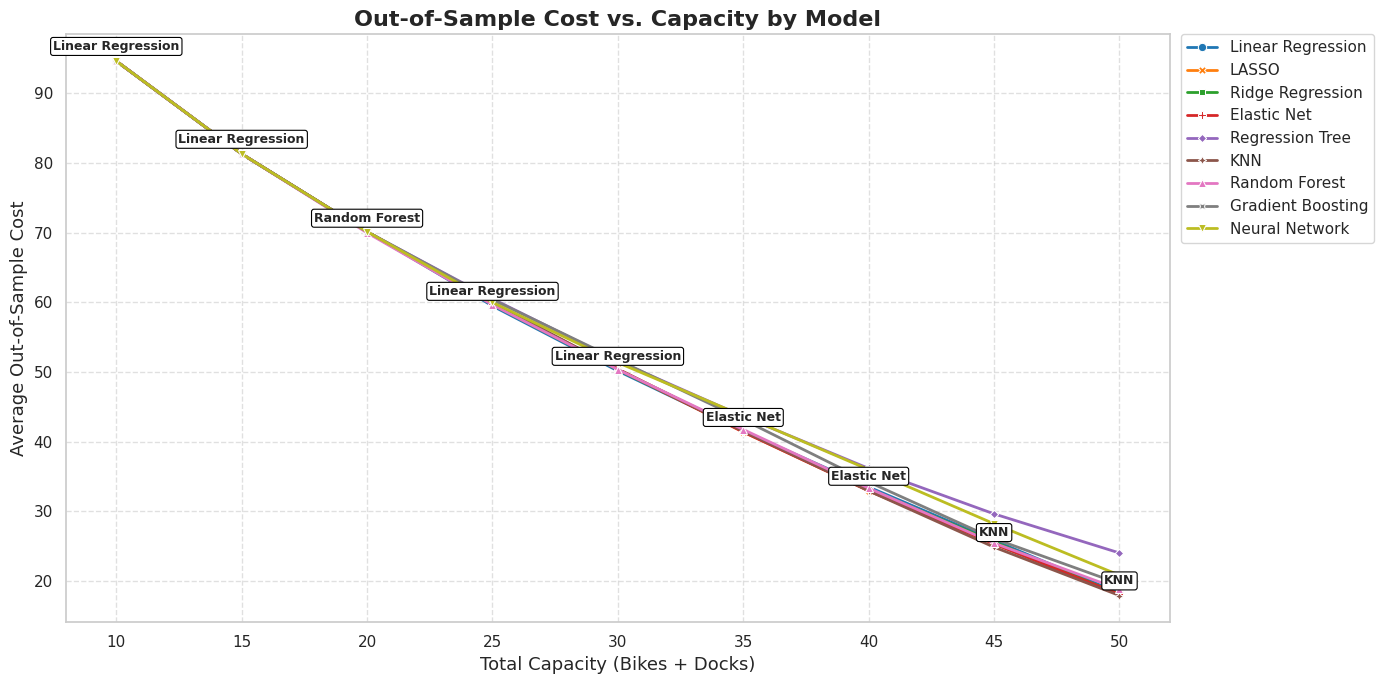

In [399]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the DataFrame to long format for seaborn plotting
cost_vs_capacity_long = cost_vs_capacity_df.reset_index().melt(id_vars="Capacity",
                                                               var_name="Model",
                                                               value_name="Cost")

# Plot the data
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid", context="notebook")

palette = sns.color_palette("tab10", n_colors=cost_vs_capacity_long["Model"].nunique())

sns.lineplot(
    data=cost_vs_capacity_long,
    x='Capacity',
    y='Cost',
    hue='Model',
    style='Model',
    markers=True,
    dashes=False,
    palette=palette,
    linewidth=2,
    marker='o'
)

# Highlight best models at each capacity
best_points = cost_vs_capacity_long.loc[cost_vs_capacity_long.groupby('Capacity')['Cost'].idxmin()]
for _, row in best_points.iterrows():
    plt.annotate(
        f"{row['Model']}",
        xy=(row['Capacity'], row['Cost']),
        xytext=(0, 8),
        textcoords='offset points',
        ha='center',
        fontsize=9,
        weight='bold',
        bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='black', lw=0.8)
    )

# Final formatting
plt.title("Out-of-Sample Cost vs. Capacity by Model", fontsize=16, fontweight='bold')
plt.xlabel("Total Capacity (Bikes + Docks)", fontsize=13)
plt.ylabel("Average Out-of-Sample Cost", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


# **CROSS VALIDATION**

In [400]:
import pandas as pd

# Assuming you have these variables defined from previous code:
# best_params_nn_pu, best_params_nn_do, best_params_rf_pu, best_params_rf_do, ... (for all models)
# grid_search_nn, grid_search_rf, grid_search_gb, grid_search_tree, grid_search_lasso, grid_search_ridge, ...

grid_models = {
    'Linear Regression (PU_ct)': ({}, float('inf')),  # No hyperparameters to tune for Linear Regression
    'Linear Regression (DO_ct)': ({}, float('inf')),  # No hyperparameters to tune for Linear Regression
    'Lasso (PU_ct)': (best_alpha, grid_search_pu.best_score_),
    'Lasso (DO_ct)': (best_alpha_do, grid_search_do.best_score_),
    'Ridge (PU_ct)': (best_alpha_ridge_pu, grid_search_ridge.best_score_),
    'Ridge (DO_ct)': (best_alpha_ridge_do, grid_search_ridge.best_score_),
    'Elastic Net (PU_ct)': (best_params_en_pu, grid_search_en.best_score_),
    'Elastic Net (DO_ct)': (best_params_en_do, grid_search_en.best_score_),
    'KNN (PU_ct)': (best_params_knn_pu, grid_search_knn.best_score_),
    'KNN (DO_ct)': (best_params_knn_do, grid_search_knn.best_score_),
    'Decision Tree (PU_ct)': (best_params_tree_pu, grid_search_tree.best_score_),
    'Decision Tree (DO_ct)': (best_params_tree_do, grid_search_tree.best_score_),
    'Random Forest (PU_ct)': (best_params_rf_pu, grid_search_rf.best_score_),
    'Random Forest (DO_ct)': (best_params_rf_do, grid_search_rf.best_score_),
    'Gradient Boosting (PU_ct)': (best_params_gb_pu, grid_search_gb.best_score_),
    'Gradient Boosting (DO_ct)': (best_params_gb_do, grid_search_gb.best_score_),
    'Neural Networks (PU_ct)': (best_params_nn_pu, grid_search_nn.best_score_),
    'Neural Networks (DO_ct)': (best_params_nn_do, grid_search_nn.best_score_),
}

results_list = []
for model_name, (best_params, best_cv_mse) in grid_models.items():
    results_list.append({
        'Model': model_name,
        'Best Params': best_params,
        'Best CV MSE': -best_cv_mse  # Negating to get positive MSE
    })

results_df = pd.DataFrame(results_list)
display(results_df)

,Model,Best Params,Best CV MSE
0,Linear Regression (PU_ct),{},-inf
1,Linear Regression (DO_ct),{},-inf
2,Lasso (PU_ct),0.911163,66.932512
3,Lasso (DO_ct),1.097499,67.136574
4,Ridge (PU_ct),10.0,70.284368
5,Ridge (DO_ct),10.0,70.284368
6,Elastic Net (PU_ct),"{'alpha': 1.0, 'l1_ratio': 0.9}",67.336230
7,Elastic Net (DO_ct),"{'alpha': 1.0, 'l1_ratio': 0.9}",67.336230
8,KNN (PU_ct),"{'metric': 'euclidean', 'n_neighbors': 11, 'we...",71.149421
9,KNN (DO_ct),"{'metric': 'euclidean', 'n_neighbors': 11, 'we...",71.149421


# **TRAINING THE FINAL MODEL**

## **Cross Validated Regression Tree Model**

In [404]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Sample check to avoid runtime error (replace with actual data in live session)
try:
    # Assume X_train, X_test, y_train, y_test are defined

    alpha_ridge = 1.0974987654930568
    alpha_lasso = 0.9111627561154896

    # Ridge
    ridge_pu = Ridge(alpha=alpha_ridge)
    ridge_do = Ridge(alpha=alpha_ridge)

    ridge_pu.fit(X_train, y_train["PU_ct"])
    ridge_do.fit(X_train, y_train["DO_ct"])

    y_pu_pred_ridge = ridge_pu.predict(X_test)
    y_do_pred_ridge = ridge_do.predict(X_test)

    mse_pu_ridge = mean_squared_error(y_test["PU_ct"], y_pu_pred_ridge)
    mse_do_ridge = mean_squared_error(y_test["DO_ct"], y_do_pred_ridge)
    mape_pu_ridge = mean_absolute_percentage_error(y_test["PU_ct"], y_pu_pred_ridge)
    mape_do_ridge = mean_absolute_percentage_error(y_test["DO_ct"], y_do_pred_ridge)
    r2_pu_ridge = r2_score(y_test["PU_ct"], y_pu_pred_ridge)
    r2_do_ridge = r2_score(y_test["DO_ct"], y_do_pred_ridge)

    # Cost for Ridge
    alpha, beta, capacity = 2, 3, 17
    costs_ridge = []
    for i in range(len(X_test)):
        pu_pred = y_pu_pred_ridge[i]
        do_pred = y_do_pred_ridge[i]
        min_cost = float("inf")
        for x in range(capacity + 1):
            y = capacity - x
            pred_cost = alpha * max(0, pu_pred - x) + beta * max(0, do_pred - y)
            if pred_cost < min_cost:
                min_cost = pred_cost
                opt_x, opt_y = x, y
        pu_actual = y_test["PU_ct"].iloc[i]
        do_actual = y_test["DO_ct"].iloc[i]
        realized_cost = alpha * max(0, pu_actual - opt_x) + beta * max(0, do_actual - opt_y)
        costs_ridge.append(realized_cost)
    avg_cost_ridge = np.mean(costs_ridge)

    # LASSO
    lasso_pu = Lasso(alpha=alpha_lasso)
    lasso_do = Lasso(alpha=alpha_lasso)

    lasso_pu.fit(X_train, y_train["PU_ct"])
    lasso_do.fit(X_train, y_train["DO_ct"])

    y_pu_pred_lasso = lasso_pu.predict(X_test)
    y_do_pred_lasso = lasso_do.predict(X_test)

    mse_pu_lasso = mean_squared_error(y_test["PU_ct"], y_pu_pred_lasso)
    mse_do_lasso = mean_squared_error(y_test["DO_ct"], y_do_pred_lasso)
    mape_pu_lasso = mean_absolute_percentage_error(y_test["PU_ct"], y_pu_pred_lasso)
    mape_do_lasso = mean_absolute_percentage_error(y_test["DO_ct"], y_do_pred_lasso)
    r2_pu_lasso = r2_score(y_test["PU_ct"], y_pu_pred_lasso)
    r2_do_lasso = r2_score(y_test["DO_ct"], y_do_pred_lasso)

    # Cost for LASSO
    costs_lasso = []
    for i in range(len(X_test)):
        pu_pred = y_pu_pred_lasso[i]
        do_pred = y_do_pred_lasso[i]
        min_cost = float("inf")
        for x in range(capacity + 1):
            y = capacity - x
            pred_cost = alpha * max(0, pu_pred - x) + beta * max(0, do_pred - y)
            if pred_cost < min_cost:
                min_cost = pred_cost
                opt_x, opt_y = x, y
        pu_actual = y_test["PU_ct"].iloc[i]
        do_actual = y_test["DO_ct"].iloc[i]
        realized_cost = alpha * max(0, pu_actual - opt_x) + beta * max(0, do_actual - opt_y)
        costs_lasso.append(realized_cost)
    avg_cost_lasso = np.mean(costs_lasso)

    # Create DataFrame
    df_summary = pd.DataFrame([
        {
            "Model": "Ridge Regression",
            "MSE (PU_ct)": mse_pu_ridge,
            "MAPE (PU_ct)": mape_pu_ridge,
            "R² (PU_ct)": r2_pu_ridge,
            "MSE (DO_ct)": mse_do_ridge,
            "MAPE (DO_ct)": mape_do_ridge,
            "R² (DO_ct)": r2_do_ridge,
            "Avg Cost": avg_cost_ridge
        },
        {
            "Model": "LASSO",
            "MSE (PU_ct)": mse_pu_lasso,
            "MAPE (PU_ct)": mape_pu_lasso,
            "R² (PU_ct)": r2_pu_lasso,
            "MSE (DO_ct)": mse_do_lasso,
            "MAPE (DO_ct)": mape_do_lasso,
            "R² (DO_ct)": r2_do_lasso,
            "Avg Cost": avg_cost_lasso
        }
    ])

    import ace_tools as tools; tools.display_dataframe_to_user(name="Ridge and LASSO Performance", dataframe=df_summary)

except Exception as e:
    str(e)

df_summary

,Model,MSE (PU_ct),MAPE (PU_ct),R² (PU_ct),MSE (DO_ct),MAPE (DO_ct),R² (DO_ct),Avg Cost
0,Ridge Regression,55.580437,0.557821,0.336695,69.546437,0.465370,0.201317,76.638889
1,LASSO,55.625362,0.558412,0.336159,69.518944,0.465575,0.201633,76.638889


## **Better Model Based on Decision Performance - KNN**

In [406]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Sample check to avoid runtime error (replace with actual data in live session)
try:
    # Assume X_train, X_test, y_train, y_test are defined

    # Best parameters for KNN
    best_params_knn = {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

    # KNN Models
    knn_pu = KNeighborsRegressor(**best_params_knn)
    knn_do = KNeighborsRegressor(**best_params_knn)

    knn_pu.fit(X_train, y_train["PU_ct"])
    knn_do.fit(X_train, y_train["DO_ct"])

    y_pu_pred_knn = knn_pu.predict(X_test)
    y_do_pred_knn = knn_do.predict(X_test)

    mse_pu_knn = mean_squared_error(y_test["PU_ct"], y_pu_pred_knn)
    mse_do_knn = mean_squared_error(y_test["DO_ct"], y_do_pred_knn)
    mape_pu_knn = mean_absolute_percentage_error(y_test["PU_ct"], y_pu_pred_knn)
    mape_do_knn = mean_absolute_percentage_error(y_test["DO_ct"], y_do_pred_knn)
    r2_pu_knn = r2_score(y_test["PU_ct"], y_pu_pred_knn)
    r2_do_knn = r2_score(y_test["DO_ct"], y_do_pred_knn)

    # Cost calculation
    alpha, beta, capacity = 2, 3, 50
    costs_knn = []
    for i in range(len(X_test)):
        pu_pred = y_pu_pred_knn[i]
        do_pred = y_do_pred_knn[i]
        min_cost = float("inf")
        for x in range(capacity + 1):
            y = capacity - x
            pred_cost = alpha * max(0, pu_pred - x) + beta * max(0, do_pred - y)
            if pred_cost < min_cost:
                min_cost = pred_cost
                opt_x, opt_y = x, y
        pu_actual = y_test["PU_ct"].iloc[i]
        do_actual = y_test["DO_ct"].iloc[i]
        realized_cost = alpha * max(0, pu_actual - opt_x) + beta * max(0, do_actual - opt_y)
        costs_knn.append(realized_cost)
    avg_cost_knn = np.mean(costs_knn)

    # Create DataFrame
    df_summary = pd.DataFrame([
        {
            "Model": "KNN",
            "MSE (PU_ct)": mse_pu_knn,
            "MAPE (PU_ct)": mape_pu_knn,
            "R² (PU_ct)": r2_pu_knn,
            "MSE (DO_ct)": mse_do_knn,
            "MAPE (DO_ct)": mape_do_knn,
            "R² (DO_ct)": r2_do_knn,
            "Avg Cost": avg_cost_knn
        }
    ])

    import ace_tools as tools; tools.display_dataframe_to_user(name="KNN Model Performance", dataframe=df_summary)

except Exception as e:
    str(e)

df_summary


,Model,MSE (PU_ct),MAPE (PU_ct),R² (PU_ct),MSE (DO_ct),MAPE (DO_ct),R² (DO_ct),Avg Cost
0,KNN,59.727732,0.594146,0.287201,70.842057,0.47441,0.186438,17.305556


*Note: I have taken help from GenAI in formulating better codes, debugging, understanding the models, and also in better visualization of results.

**-----------------------------------------------------------------------------**

**Extra**

Average MSE for each Model across PU_ct and DO_ct (Sorted):

RegTree: 65.9338
RF: 67.5747
Lasso: 67.7285
GB: 69.0122
EN: 69.2554
Ridge: 69.4547
KNN: 86.8388
NN: 138.3798


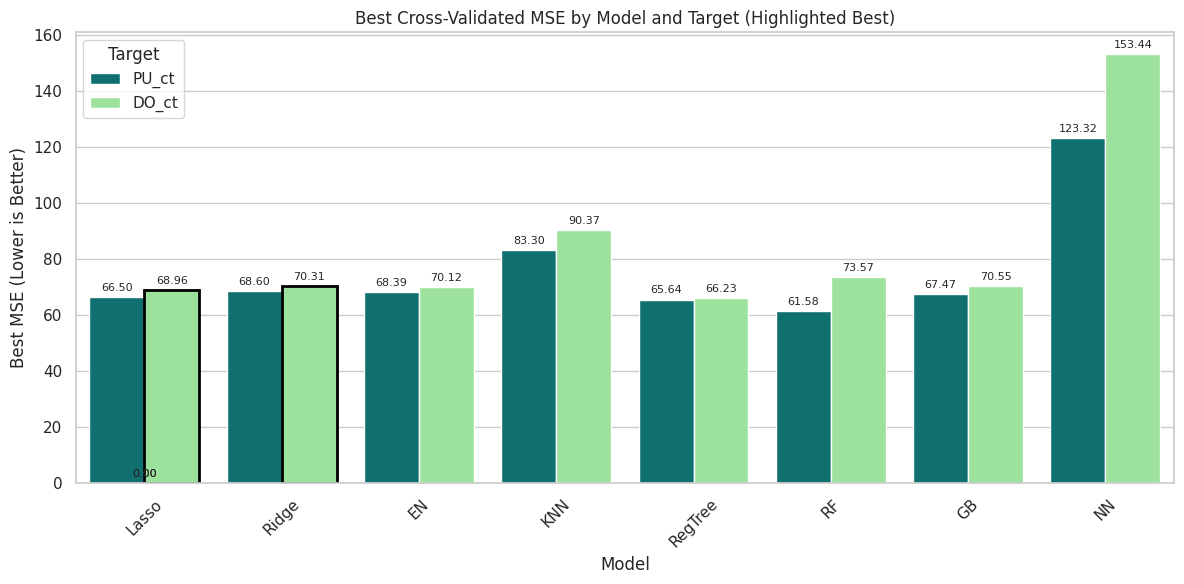

In [401]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

if not grid_results_df.empty:
    # Calculate average MSE for each model across PU_ct and DO_ct
    avg_mse_by_model = grid_results_df.groupby("Model")["Best MSE"].mean().sort_values(ascending=True)

    # Get best models for each target (minimum MSE) - for highlighting
    best_models = grid_results_df.loc[grid_results_df.groupby("Target")["Best MSE"].idxmin()]

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=grid_results_df,
        x="Model",
        y="Best MSE",
        hue="Target",
        palette={"PU_ct": "teal", "DO_ct": "lightgreen"}
    )

    # Highlight best model bars by outlining
    for i, bar in enumerate(ax.patches):
        target = "PU_ct" if i < len(grid_results_df) / 2 else "DO_ct"
        model = grid_results_df.iloc[i % len(grid_results_df) // 2]["Model"]
        if model in best_models[best_models["Target"] == target]["Model"].values:
            bar.set_edgecolor("black")
            bar.set_linewidth(2)

    # Adding labels to the bars
    autolabel(ax.patches, ax)

    # Print average MSE for each model
    print("Average MSE for each Model across PU_ct and DO_ct (Sorted):\n")
    for model, mse in avg_mse_by_model.items():
        print(f"{model}: {mse:.4f}")

    plt.title("Best Cross-Validated MSE by Model and Target (Highlighted Best)")
    plt.ylabel("Best MSE (Lower is Better)")
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Grid search results are not available. Please run the tuning process first.")